In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from format_data import *

# Visualisations et analyse exploratoire des données  

### Importation et formattage des données

In [2]:
data = pd.read_csv("./data/GAN_train.csv", index_col=0)
data = format_data(data)
data.describe()

TMQ          U850          V850          UBOT          VBOT  \
count  21338.000000  21338.000000  21338.000000  21338.000000  21338.000000   
mean      35.415316     -0.125339      0.041867     -1.947280     -0.551639   
std       13.295289      7.427620      4.737244      6.418977      4.966930   
min        6.960679    -58.805229    -26.216906    -58.260475    -20.760452   
25%       24.350419     -5.265844     -2.363580     -6.549975     -3.505941   
50%       35.089394     -1.443736      0.221333     -2.830983     -0.650379   
75%       45.686671      4.204585      2.489112      1.945248      2.262529   
max       82.829861     33.477697     60.465267     30.843592     31.106283   

             QREFHT             PS            PSL          T200          T500  \
count  21338.000000   21338.000000   21338.000000  21338.000000  21338.000000   
mean       0.014378  101540.494702  101545.108328    216.870464    264.261861   
std        0.004067     556.960660     552.860407      2.410303      3.667455   
min        0.003814   96611.601560   96611.601560    208.824249    249.146011   
25%        0.011147  101148.712875  101153.111350    215.363197    262.676468   
50%        0.014503  101515.496100  101513.521131    217.159470    265.238251   
75%        0.018108  101884.927725  101889.473909    218.501273    266.855995   
max        0.024951  103996.953100  103996.953100    229.172897    273.580810   

       ...  TMQ_WINDBOT_INTERACTION  QREFHT_TREFHT_INTERACTION    TMQ_SQUARE  \
count  ...             21338.000000               21338.000000  21338.000000   
mean   ...               263.971693                   4.283384   1431.001023   
std    ...               203.315725                   1.256774    987.605584   
min    ...                 1.923600                   1.109059     48.451046   
25%    ...               135.740456                   3.278290    592.942908   
50%    ...               219.607942                   4.308100   1231.265544   
75%    ...               329.962716                   5.447099   2087.271907   
max    ...              5024.693054                   7.502167   6860.785903   

       WIND850_MAGNITUDE_SQUARE  WINDBOT_MAGNITUDE_SQUARE  TREFHT_SQUARE  \
count              21338.000000              21338.000000   21338.000000   
mean                  77.624855                 69.966772   88130.898747   
std                  149.526829                 89.452291    2429.985316   
min                    0.000379                  0.008070   81468.381835   
25%                   16.474649                 21.600121   86545.335155   
50%                   38.342356                 47.684398   88289.839697   
75%                   80.932598                 91.928639   90337.573342   
max                 5163.692272               3882.428038   92637.564294   

          MONTH_SIN     MONTH_COS    LAPSE_RATE         Label  
count  2.133800e+04  21338.000000  21338.000000  21338.000000  
mean  -4.346728e-01     -0.264901      0.157971      0.518793  
std    5.725636e-01      0.642723      0.011343      0.847763  
min   -1.000000e+00     -1.000000      0.090769      0.000000  
25%   -8.660254e-01     -0.866025      0.154951      0.000000  
50%   -5.000000e-01     -0.500000      0.161370      0.000000  
75%    1.224647e-16      0.500000      0.164729      1.000000  
max    1.000000e+00      1.000000      0.193053      2.000000  

[8 rows x 48 columns]

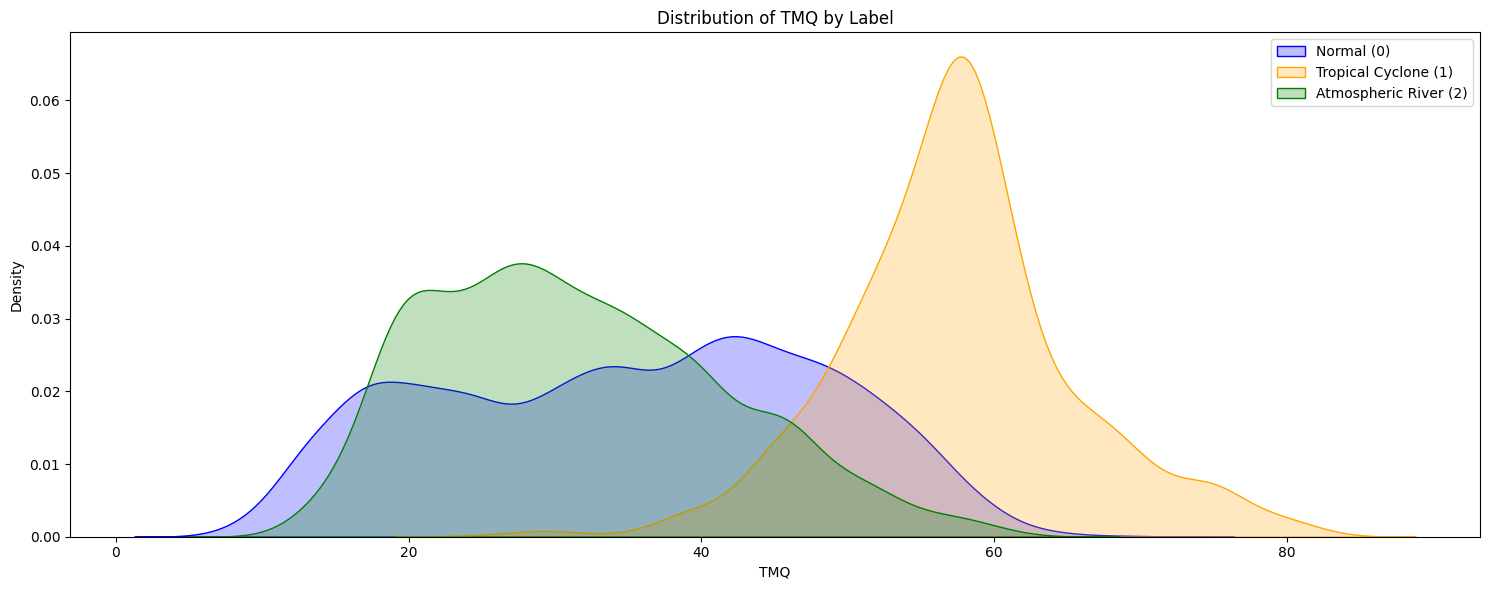

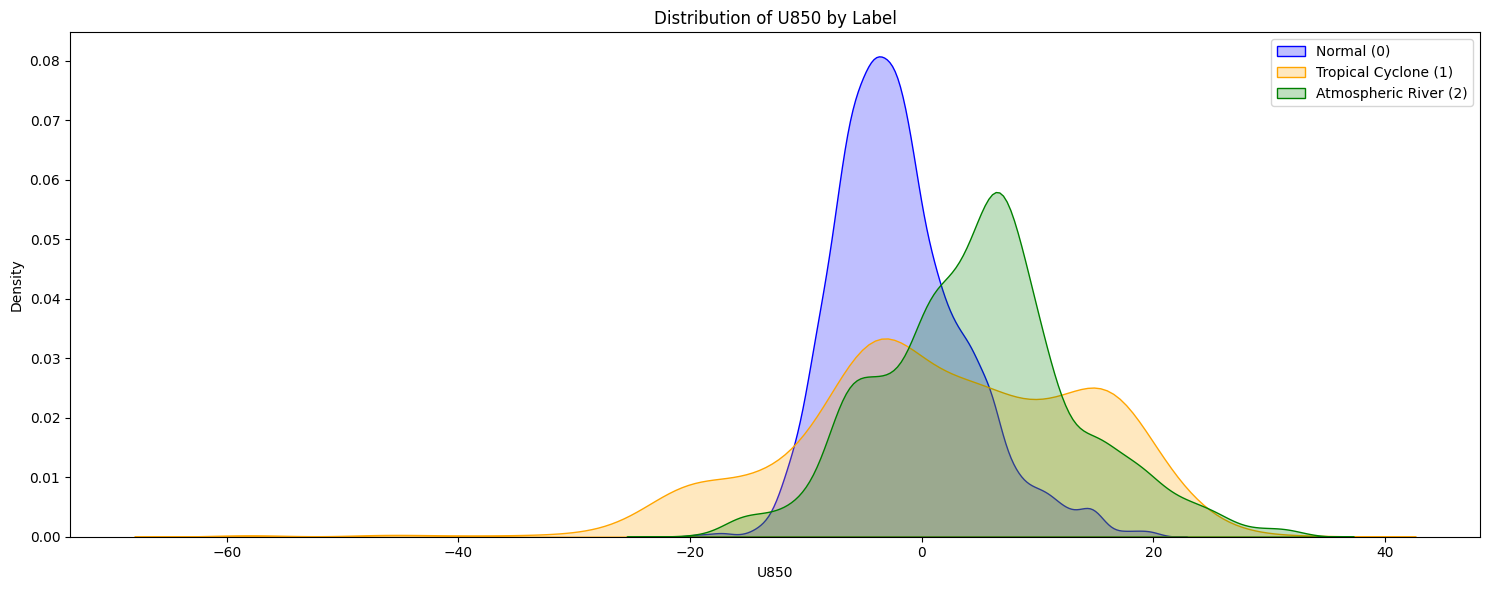

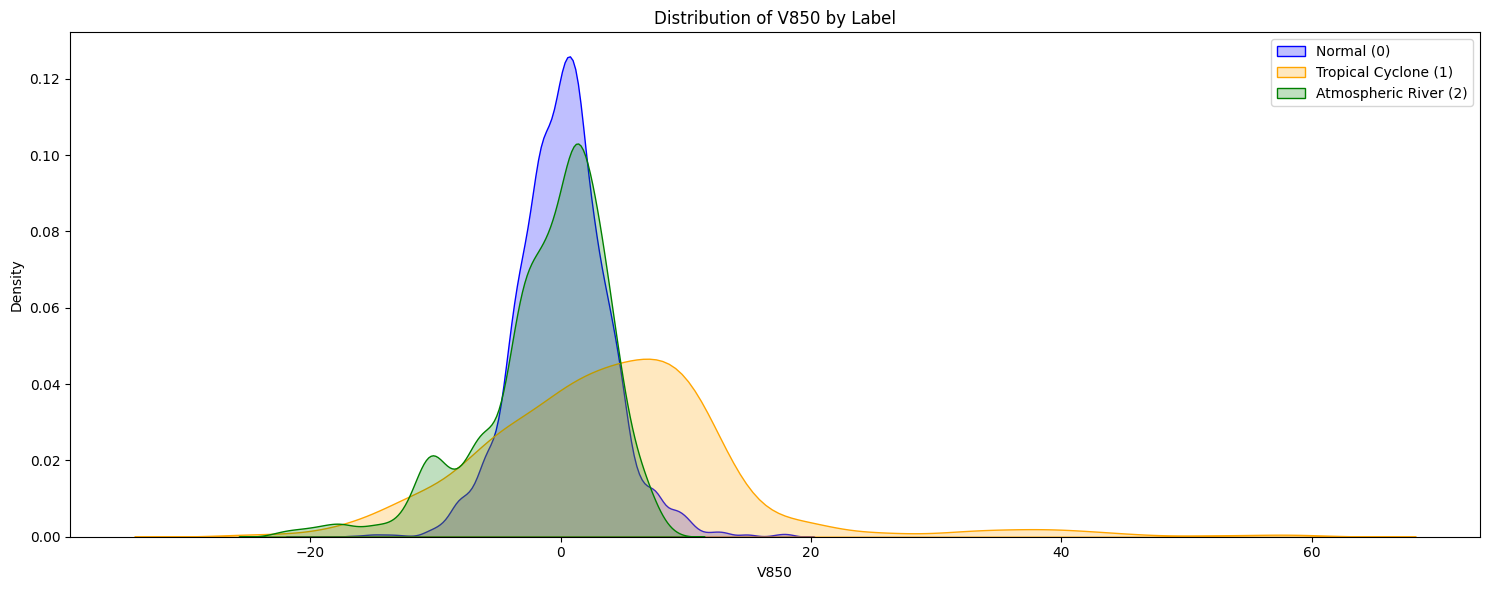

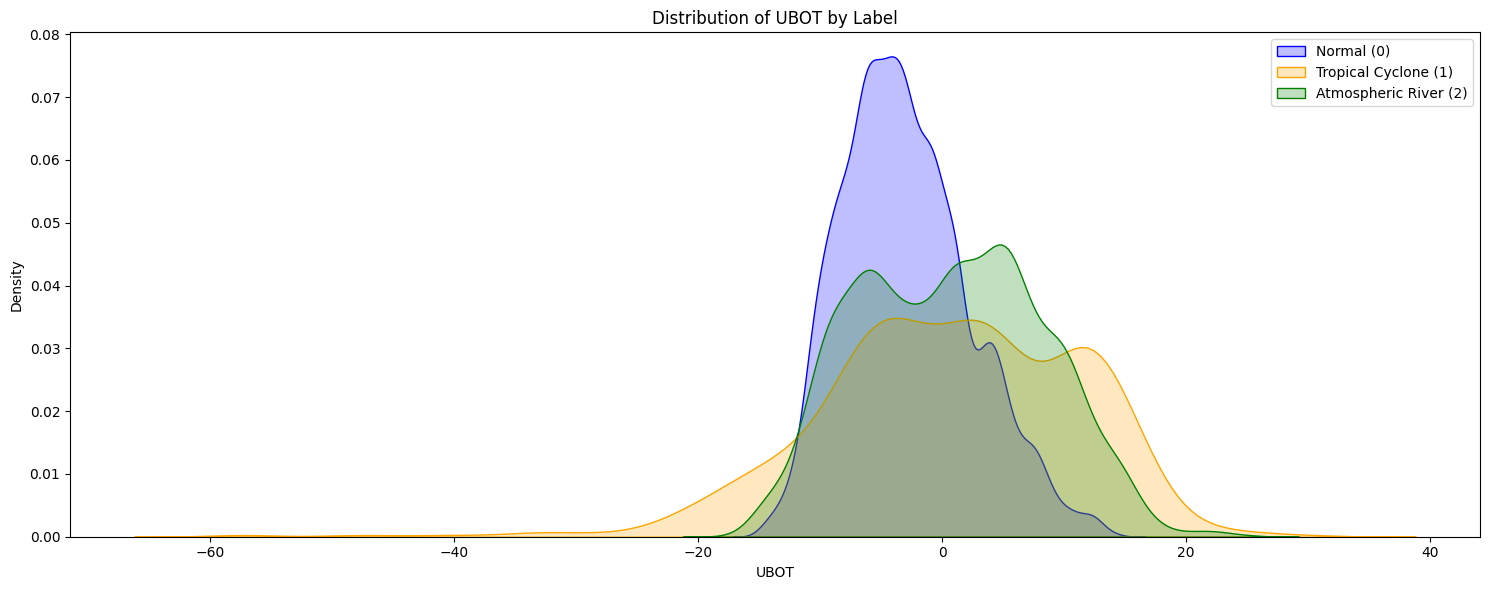

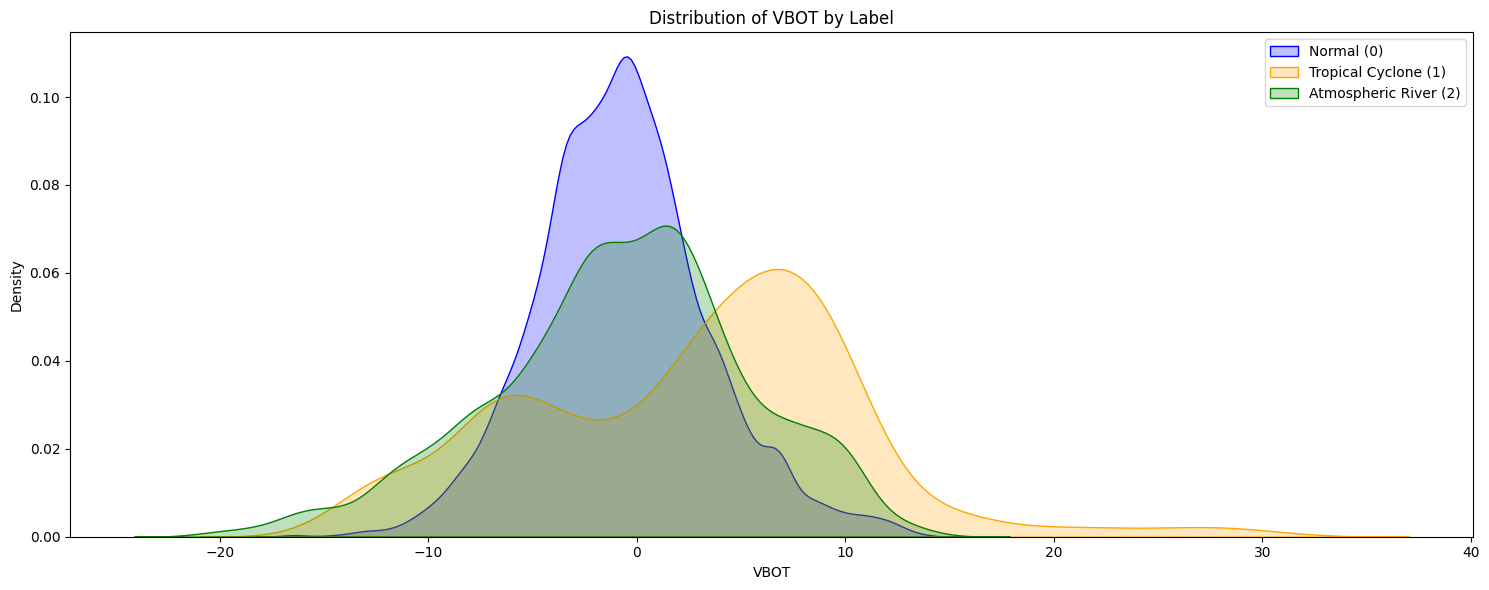

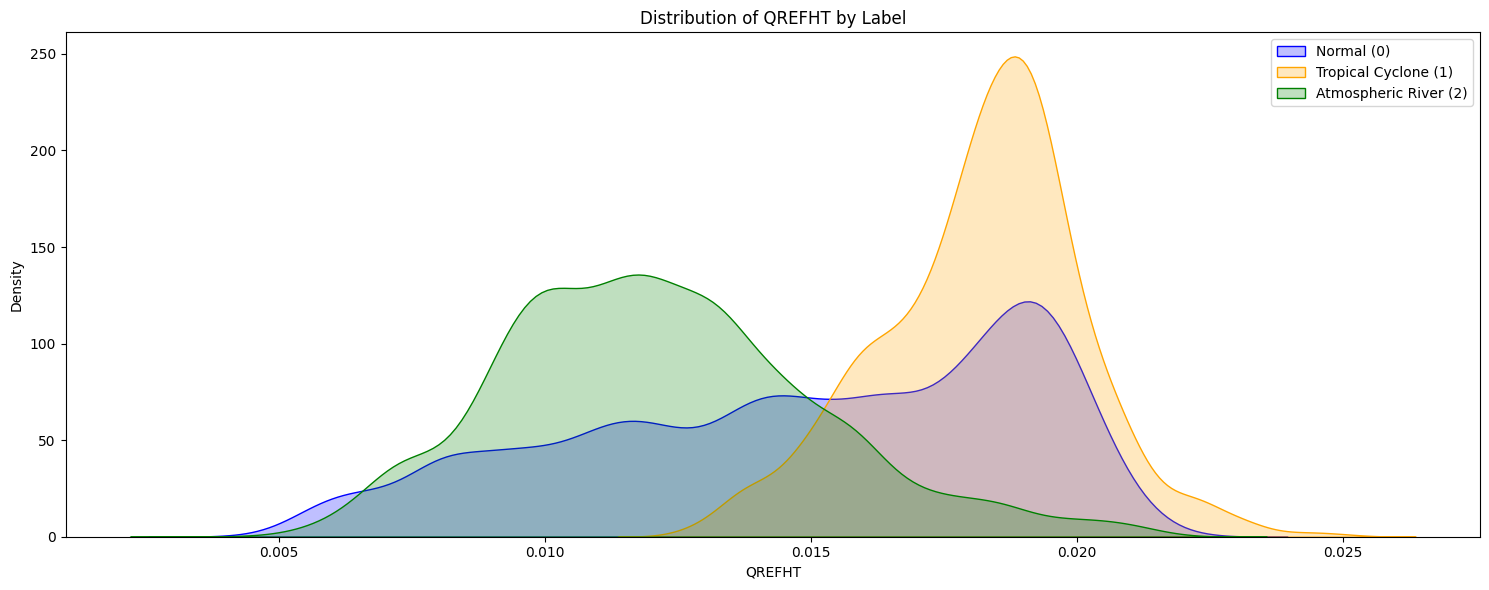

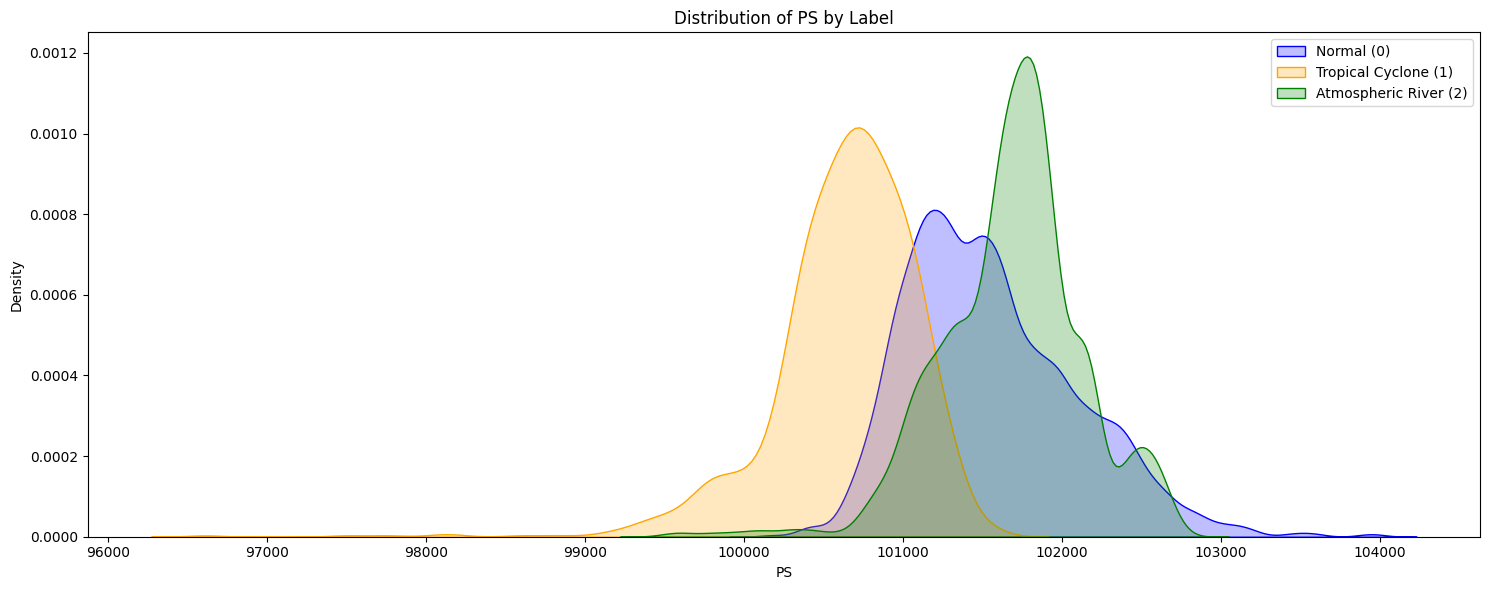

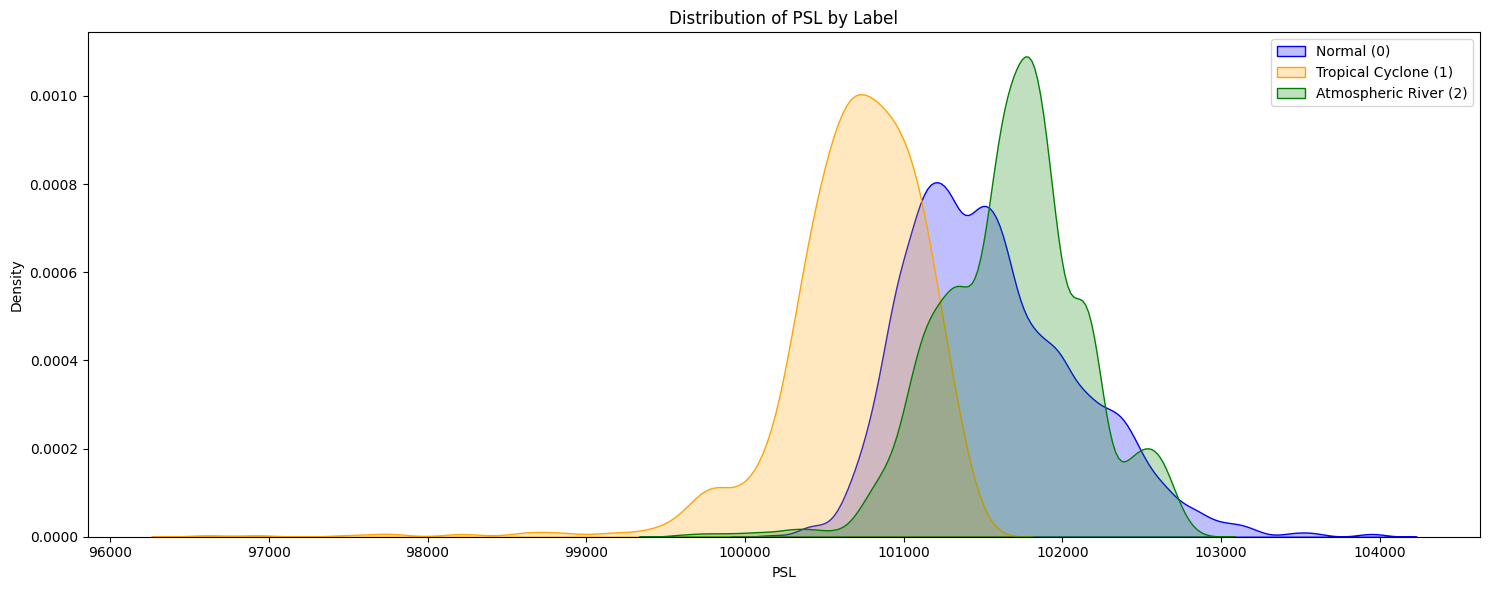

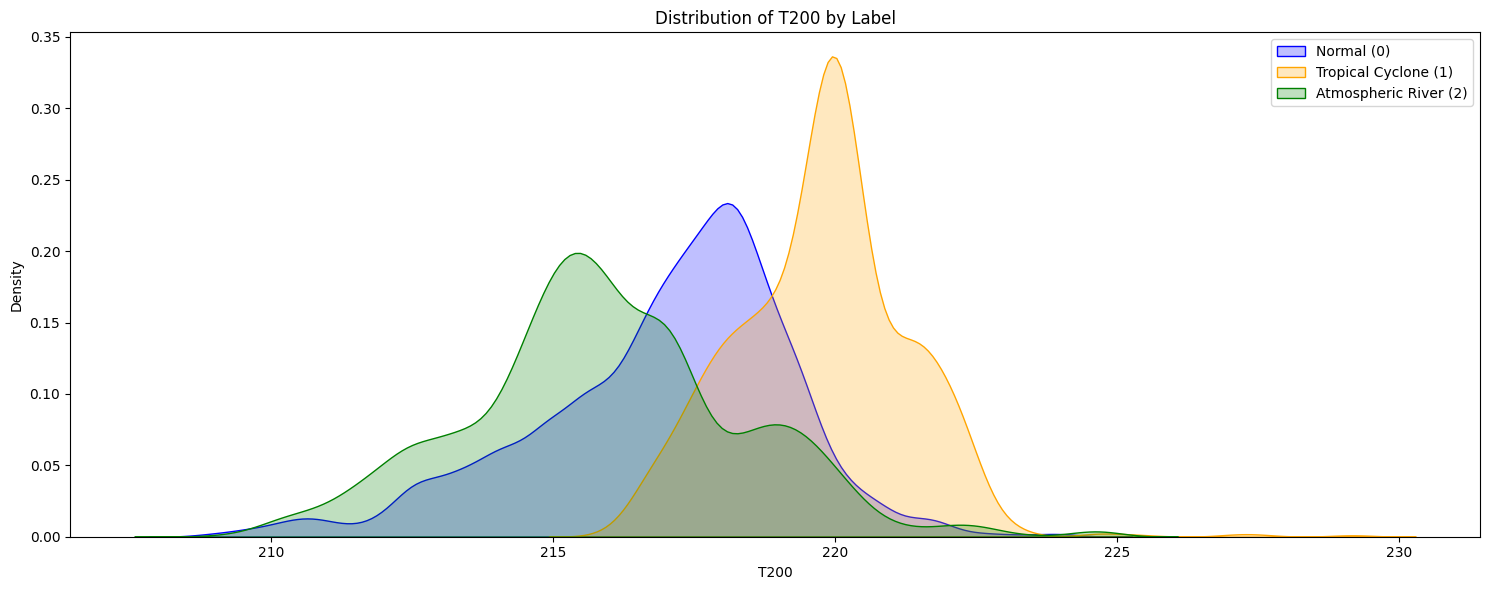

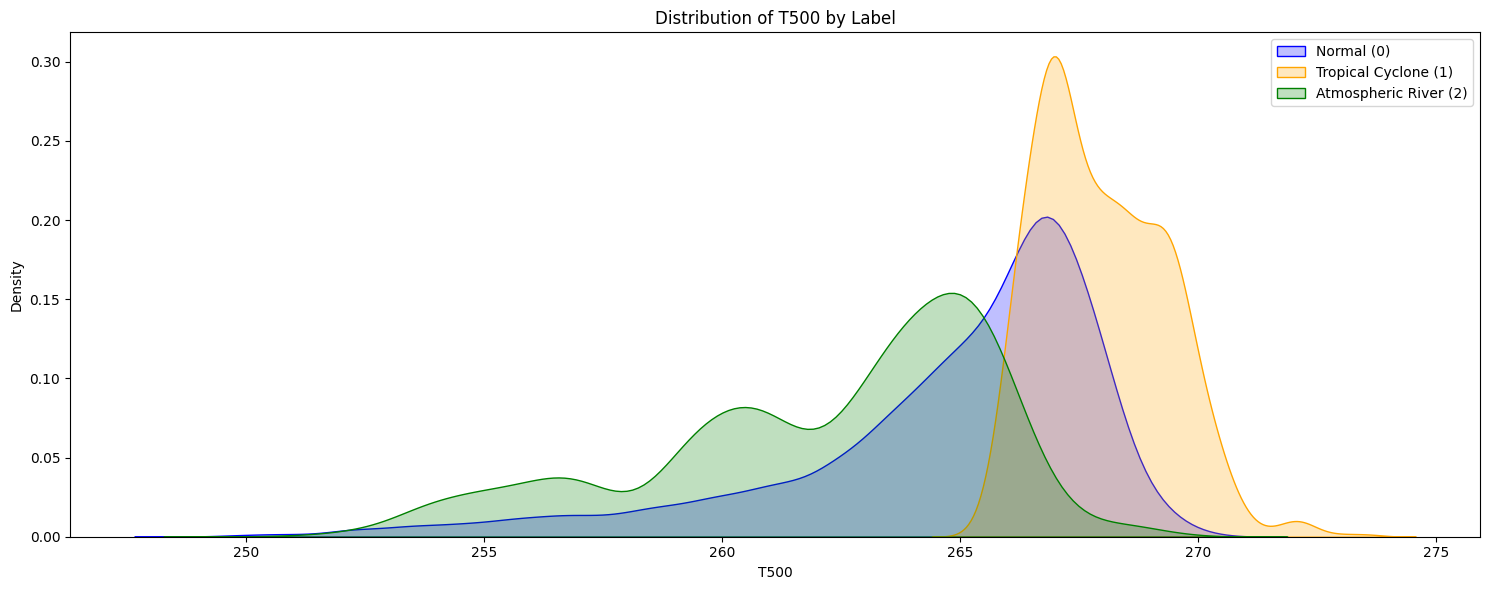

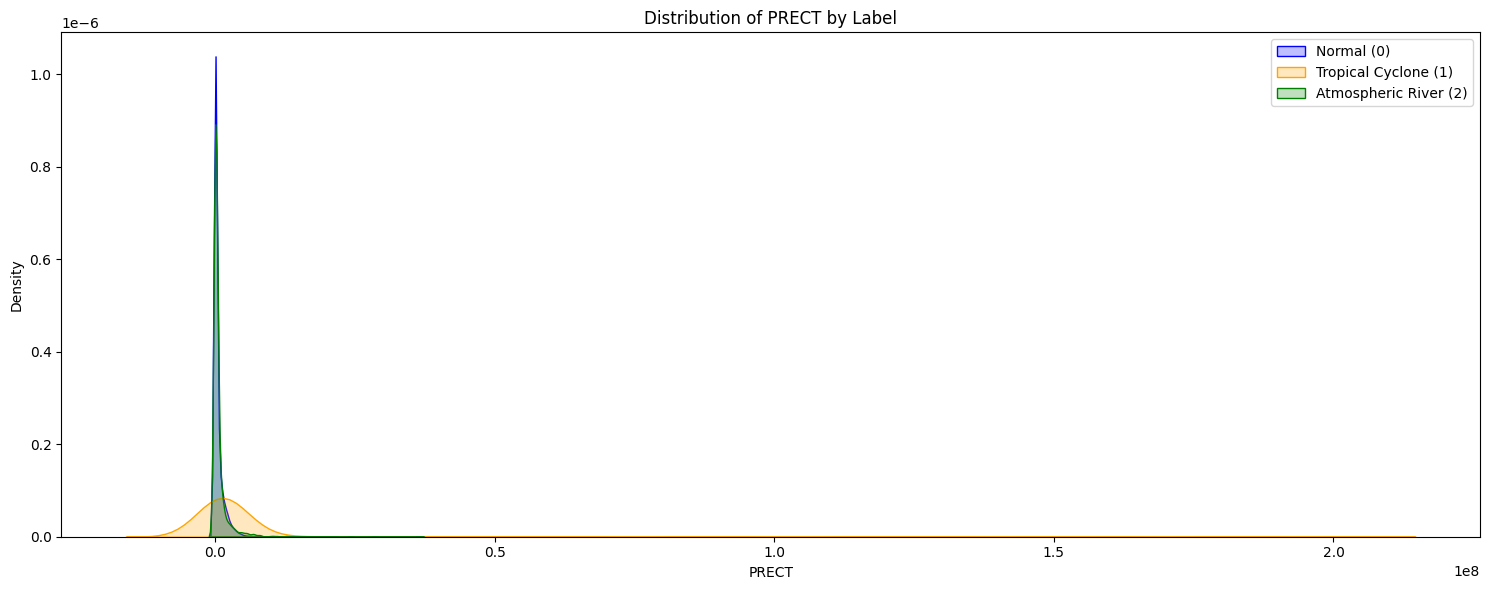

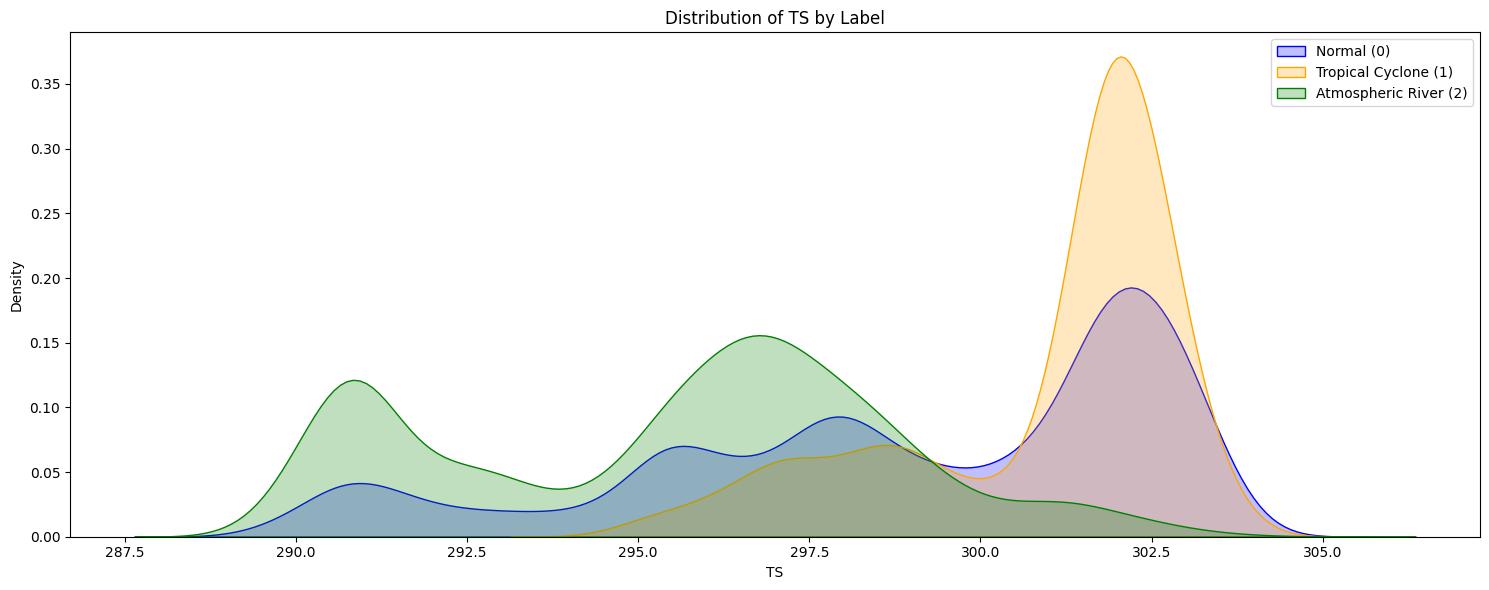

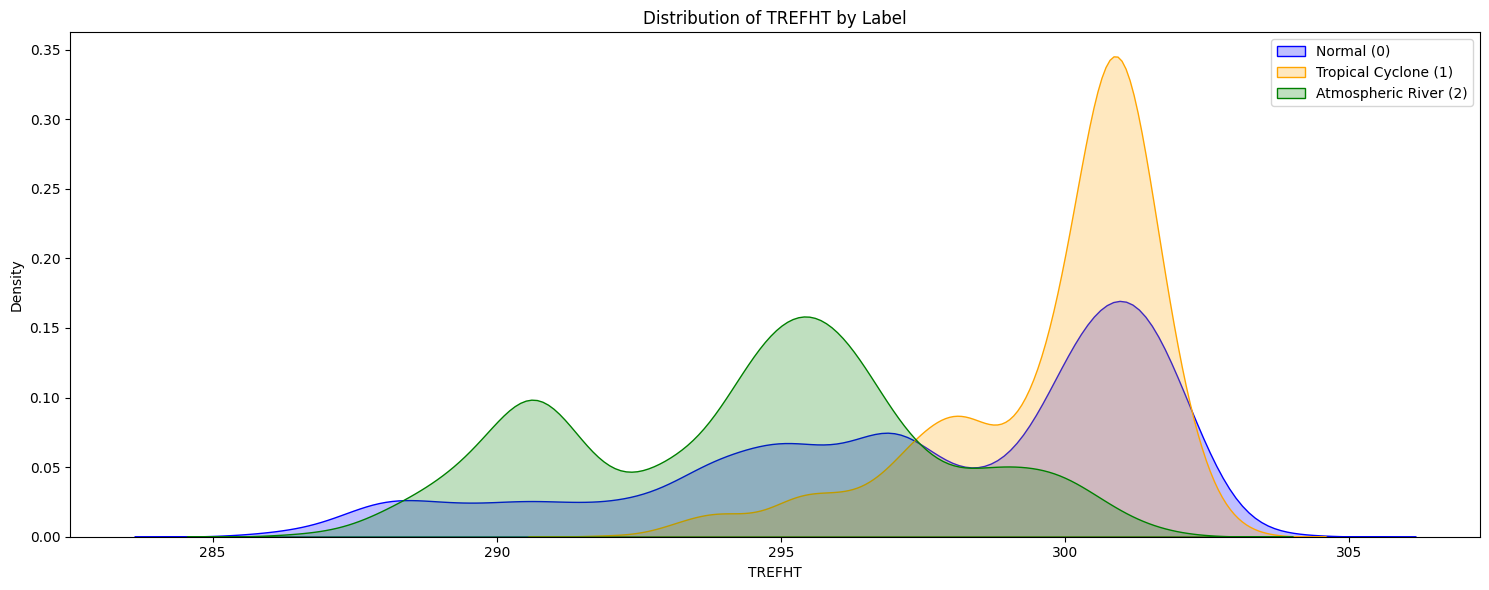

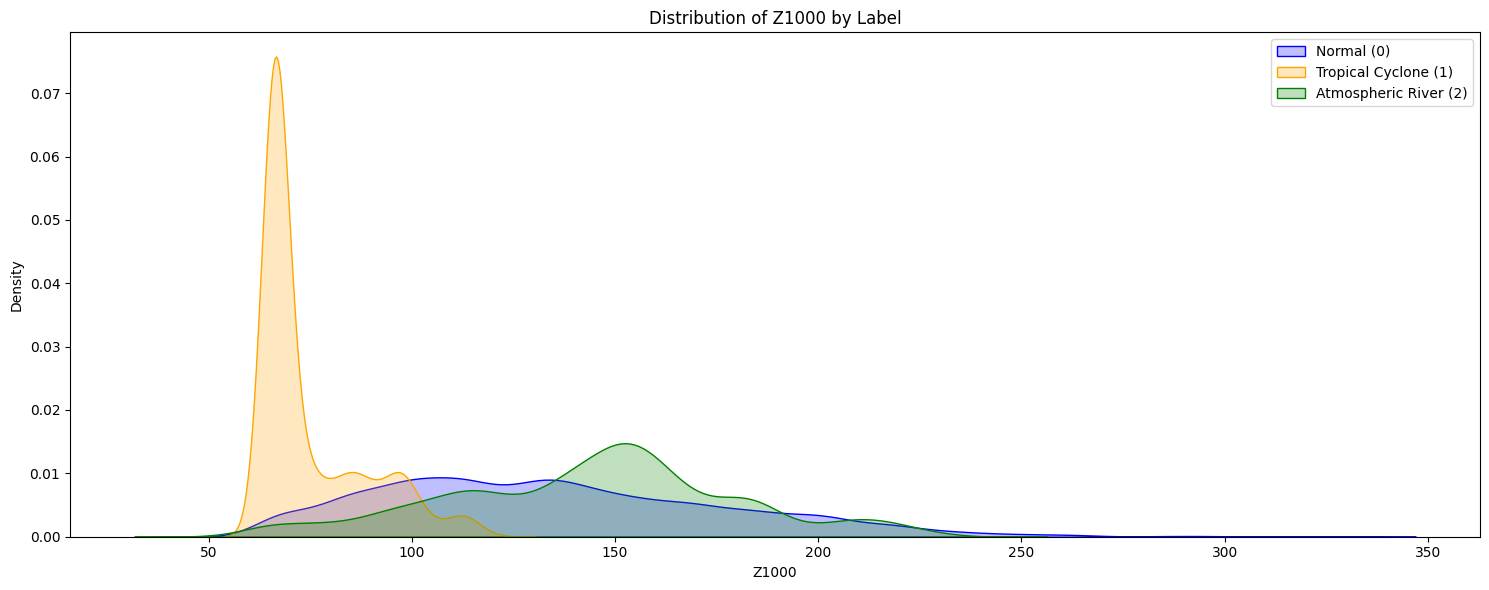

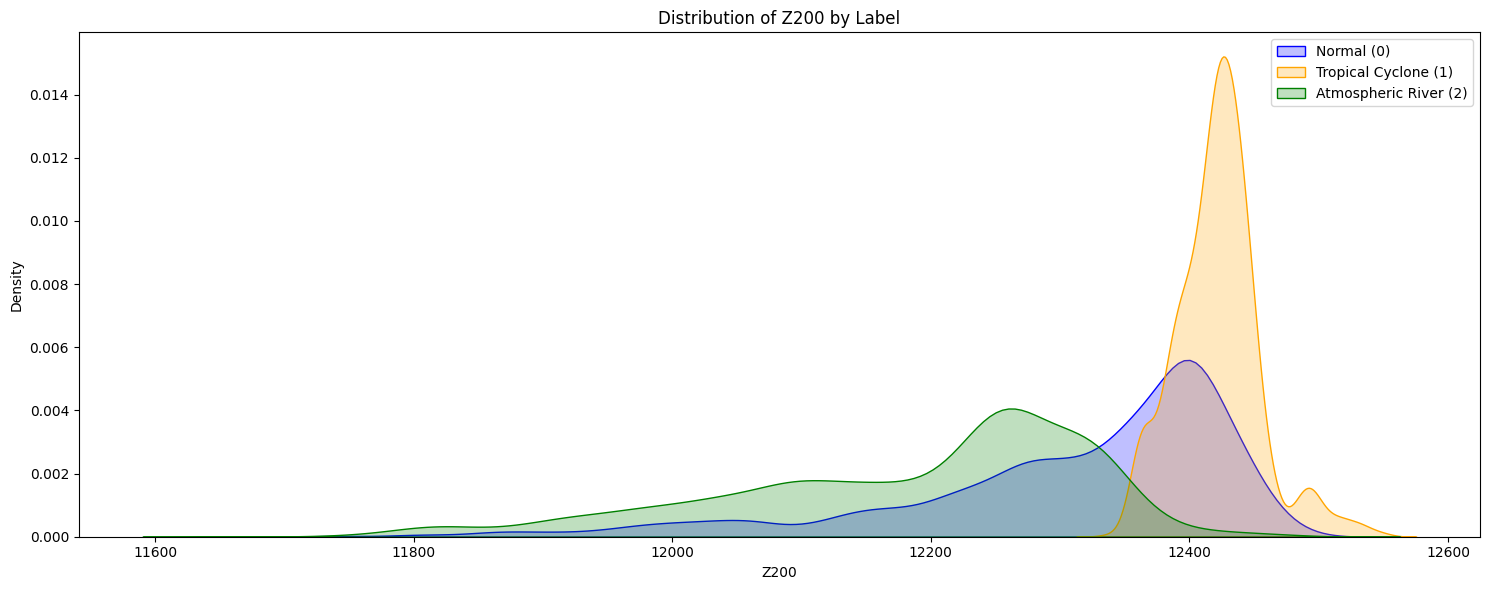

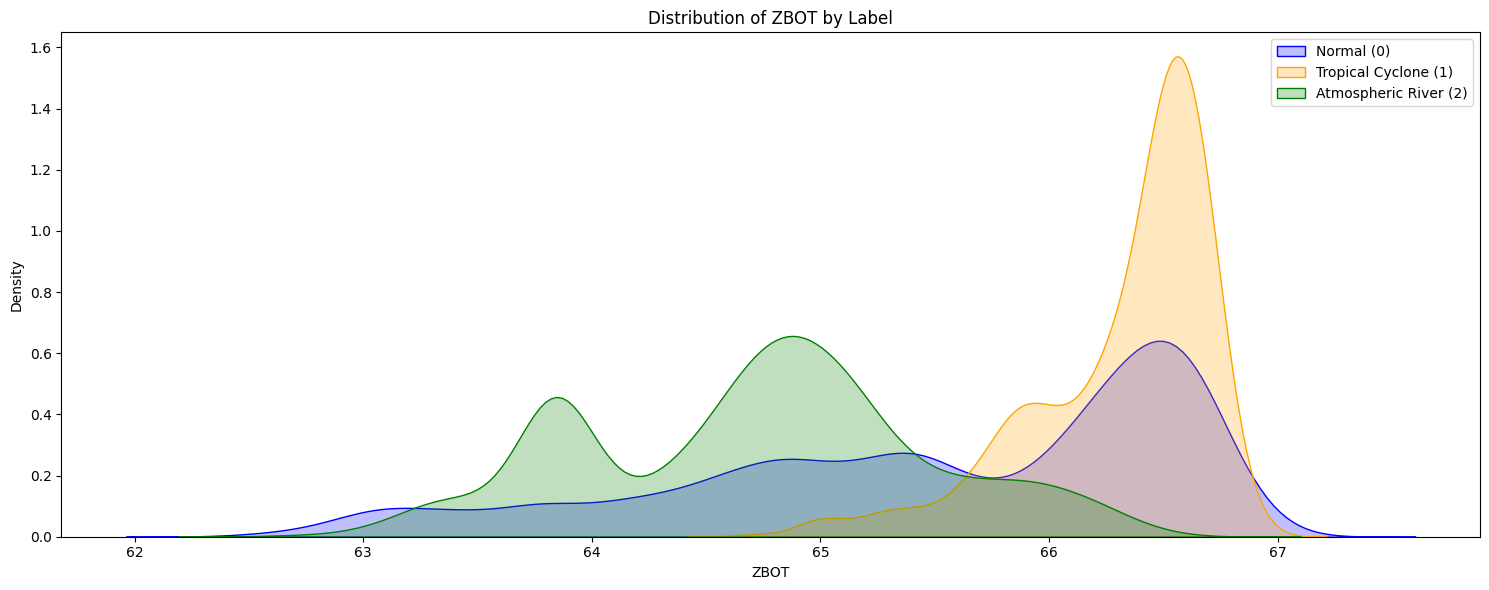

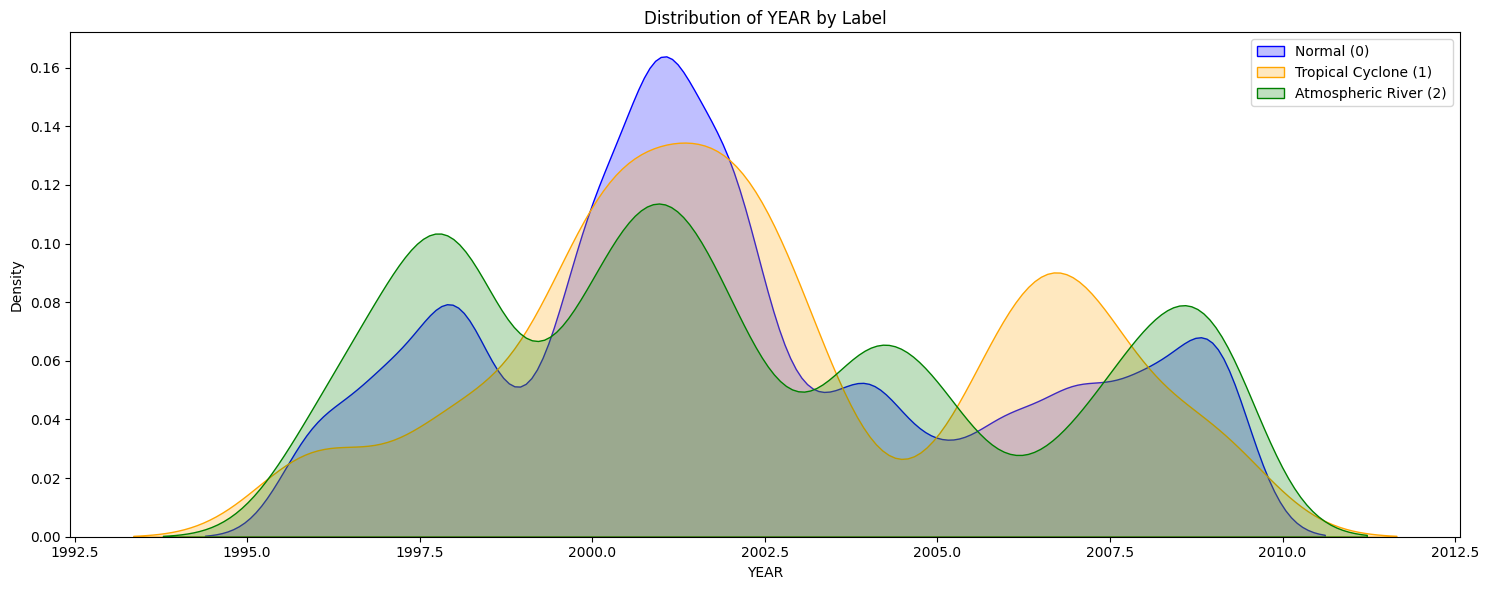

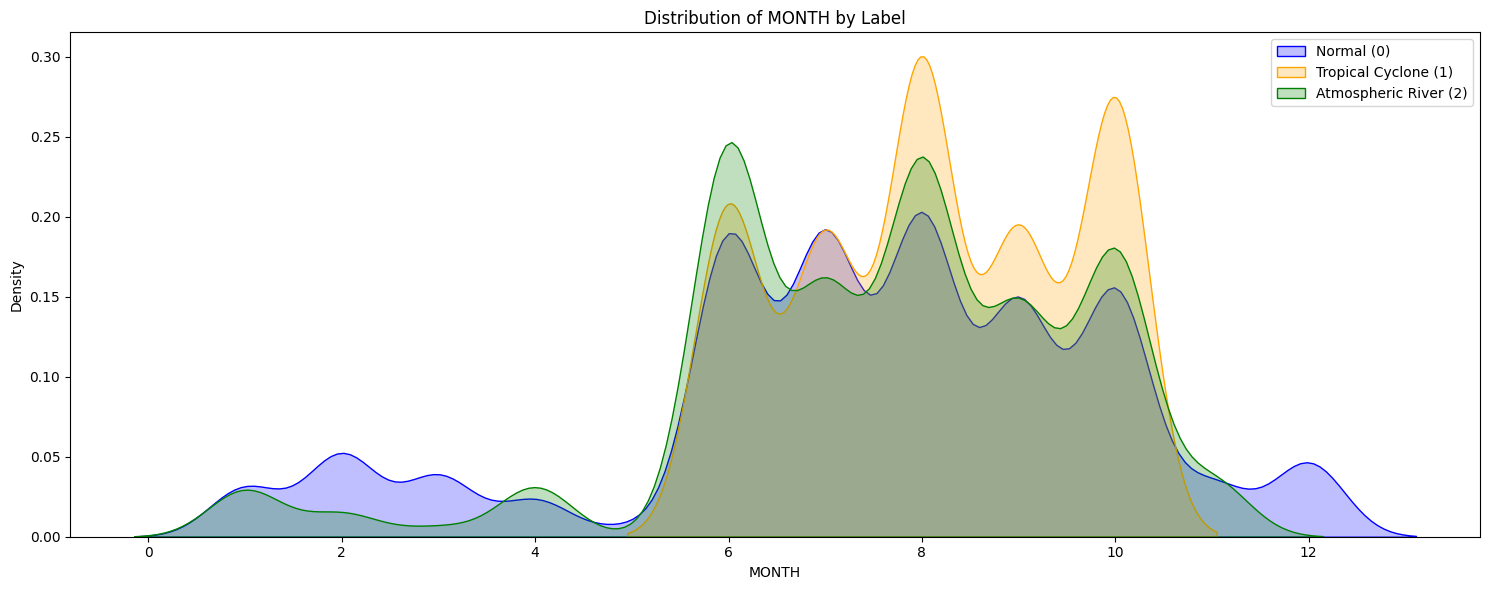

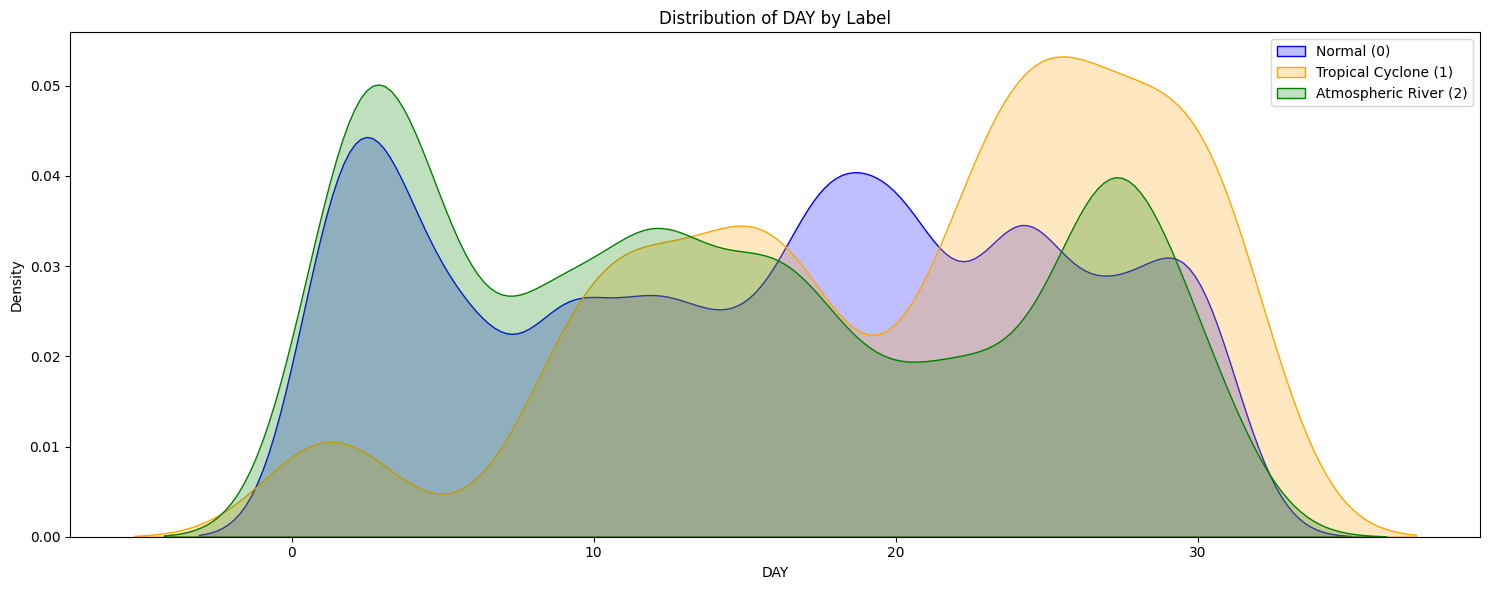

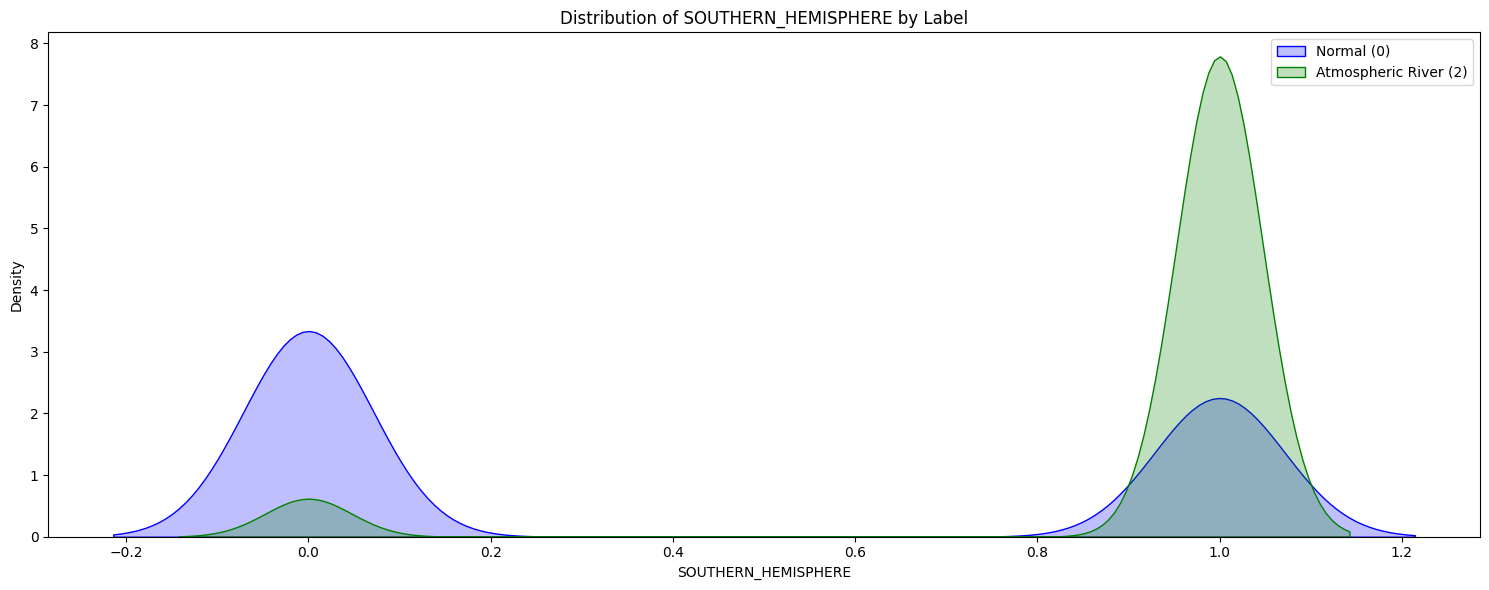

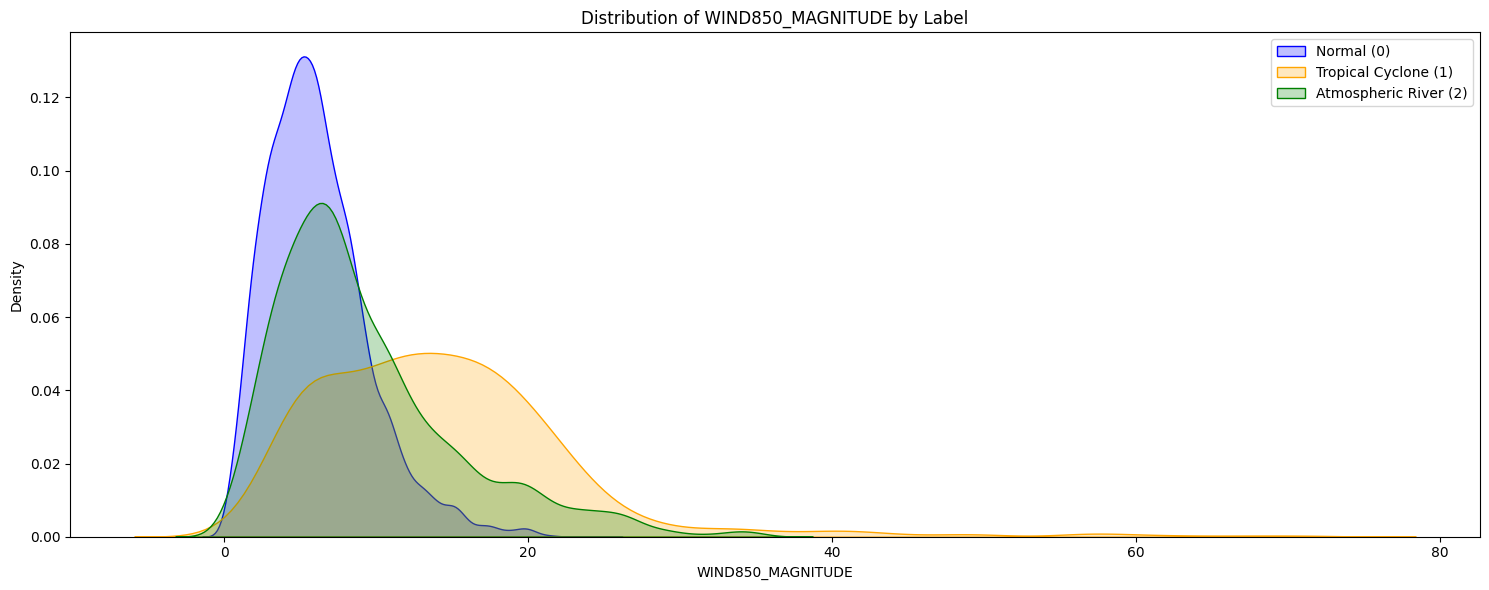

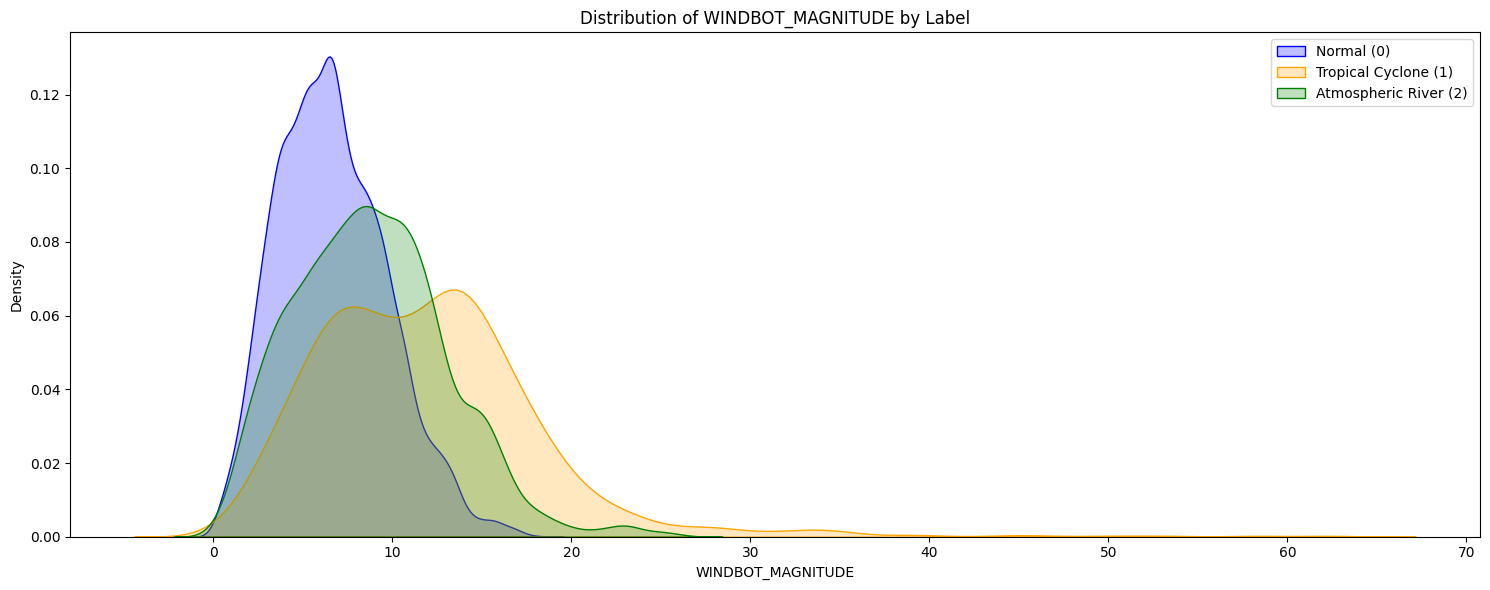

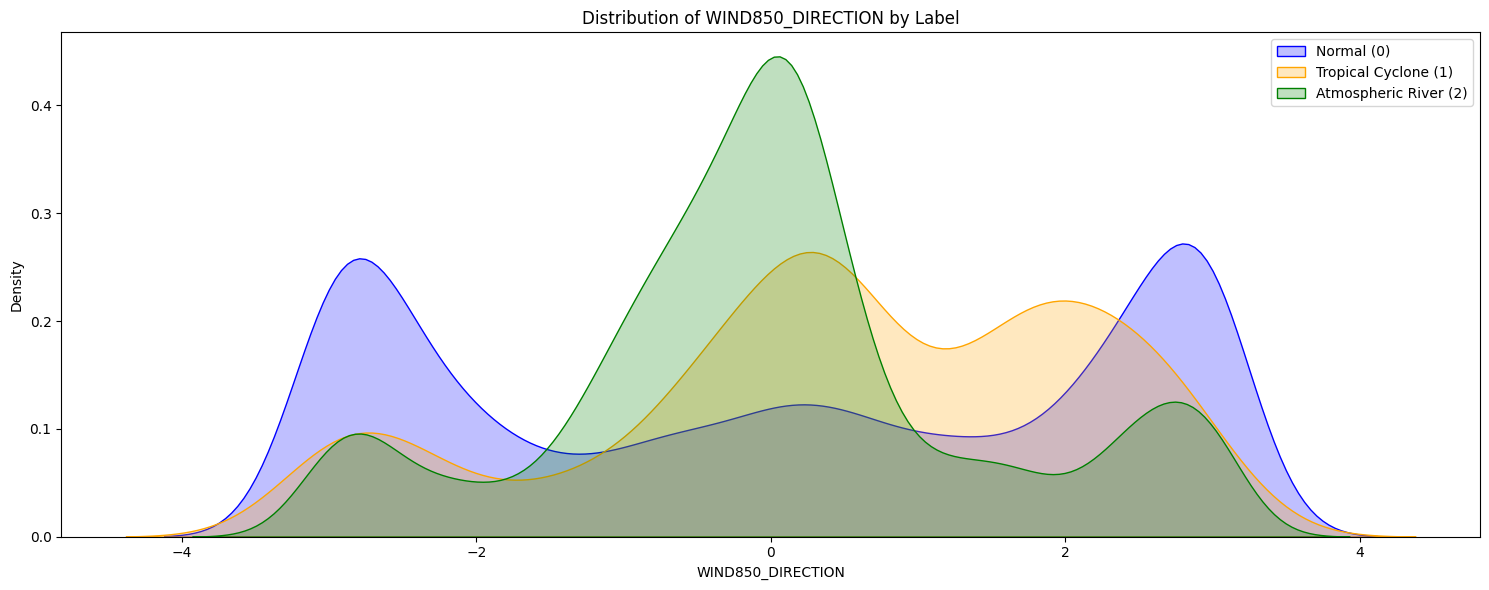

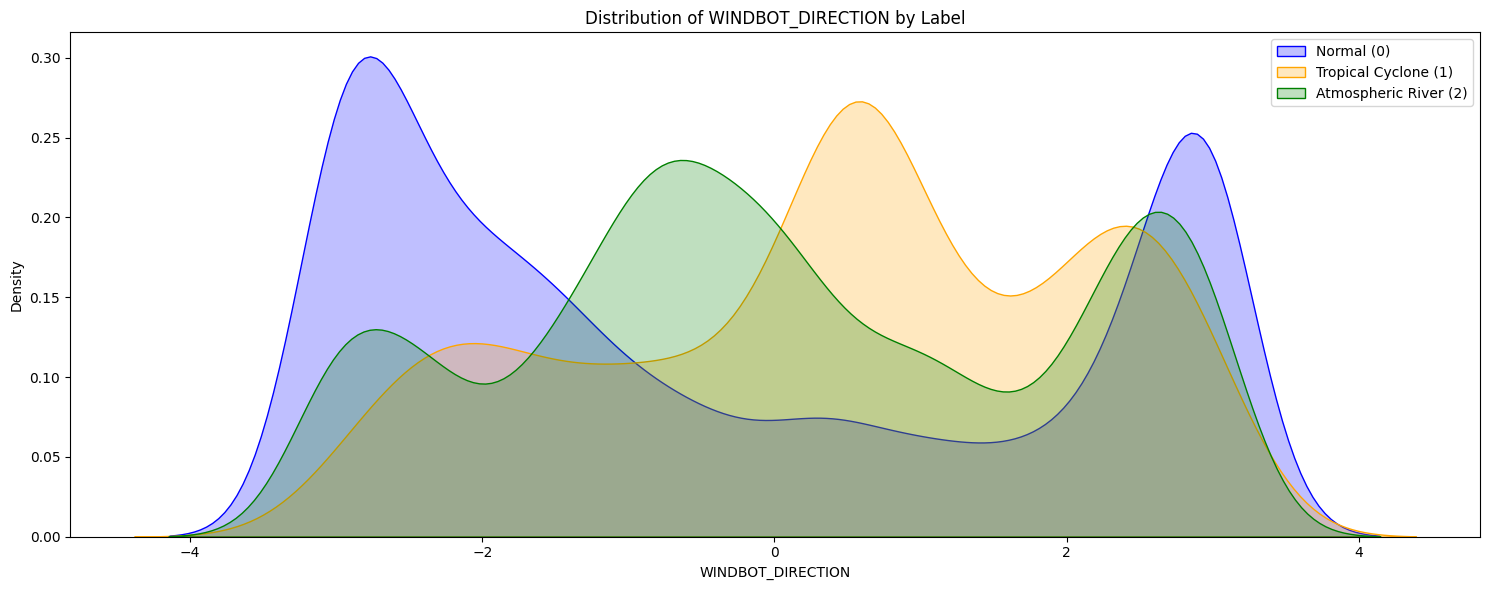

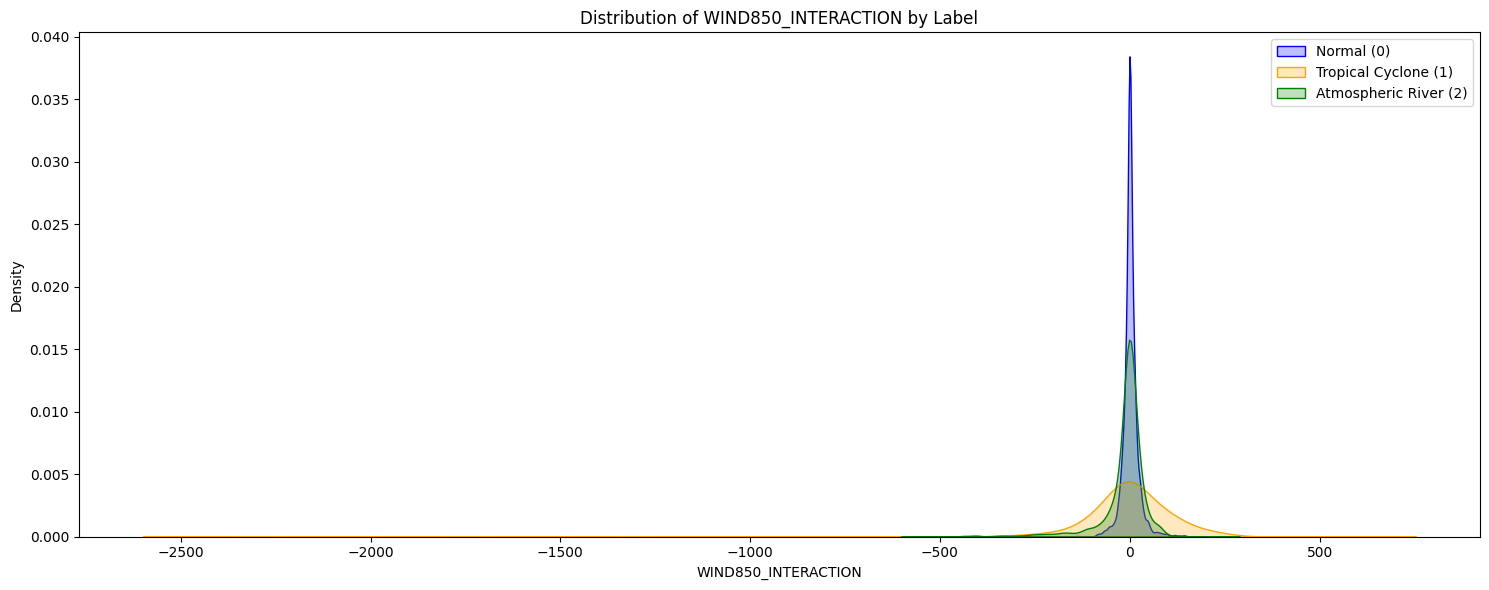

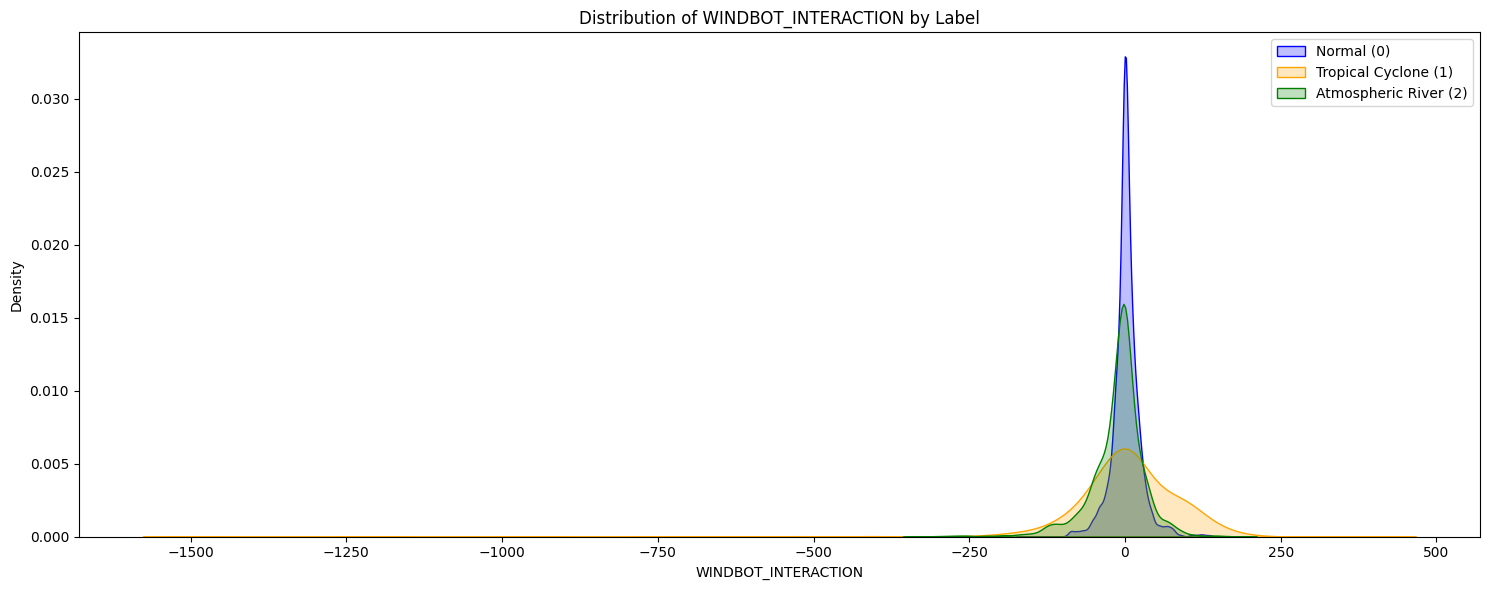

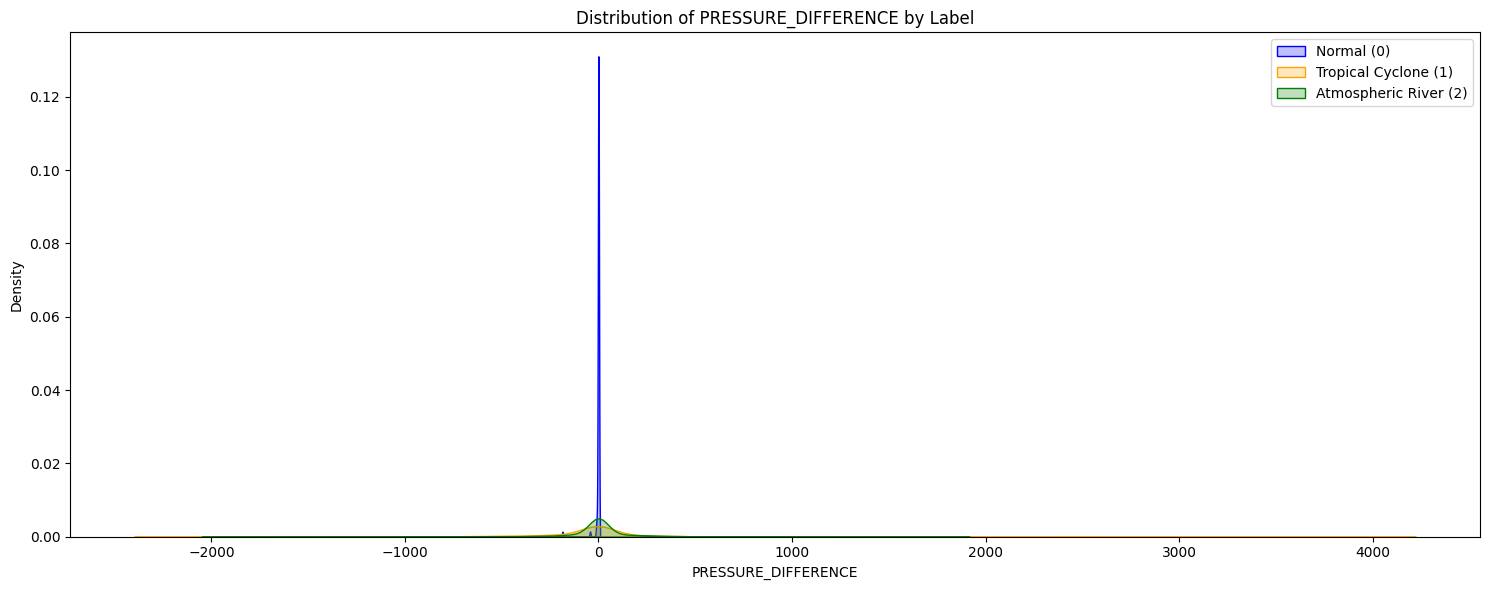

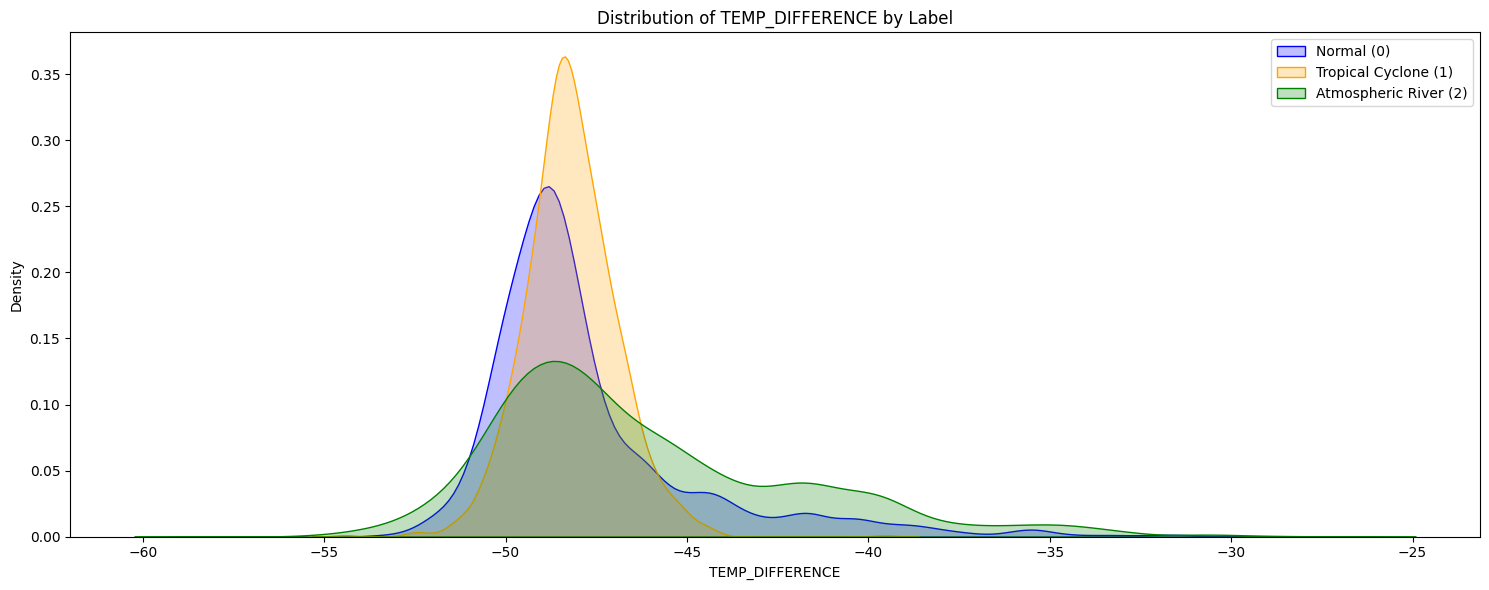

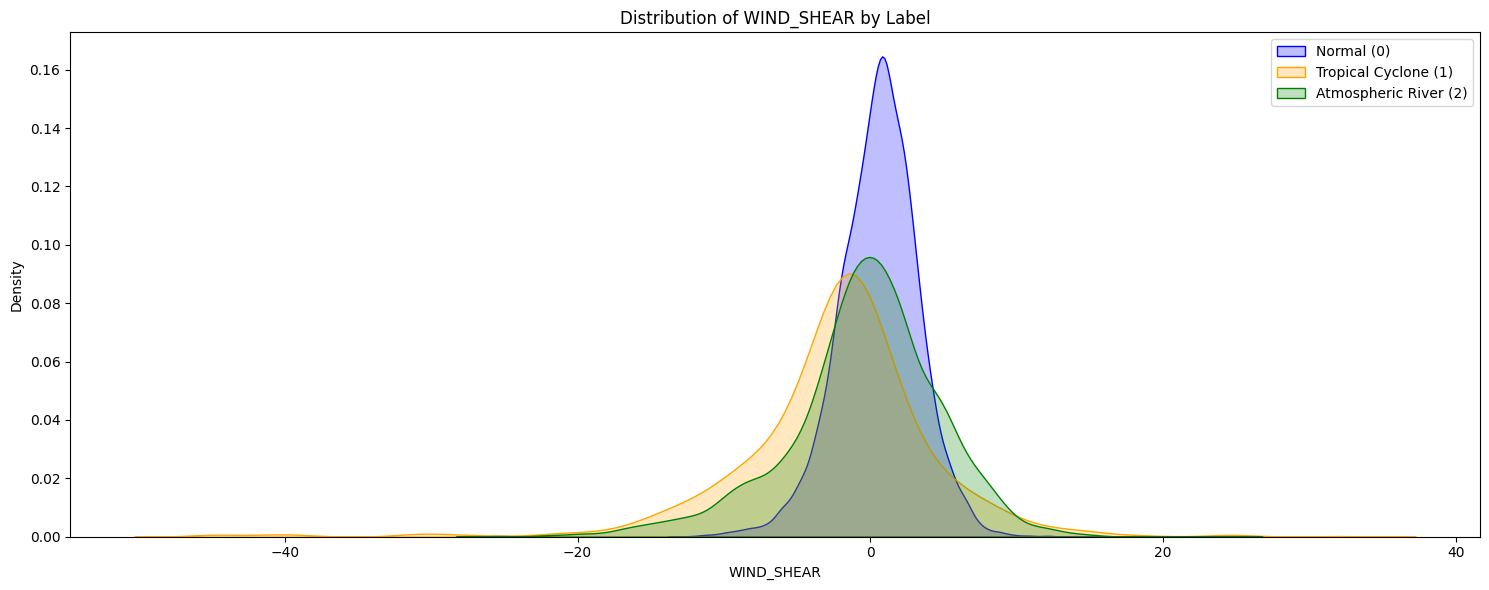

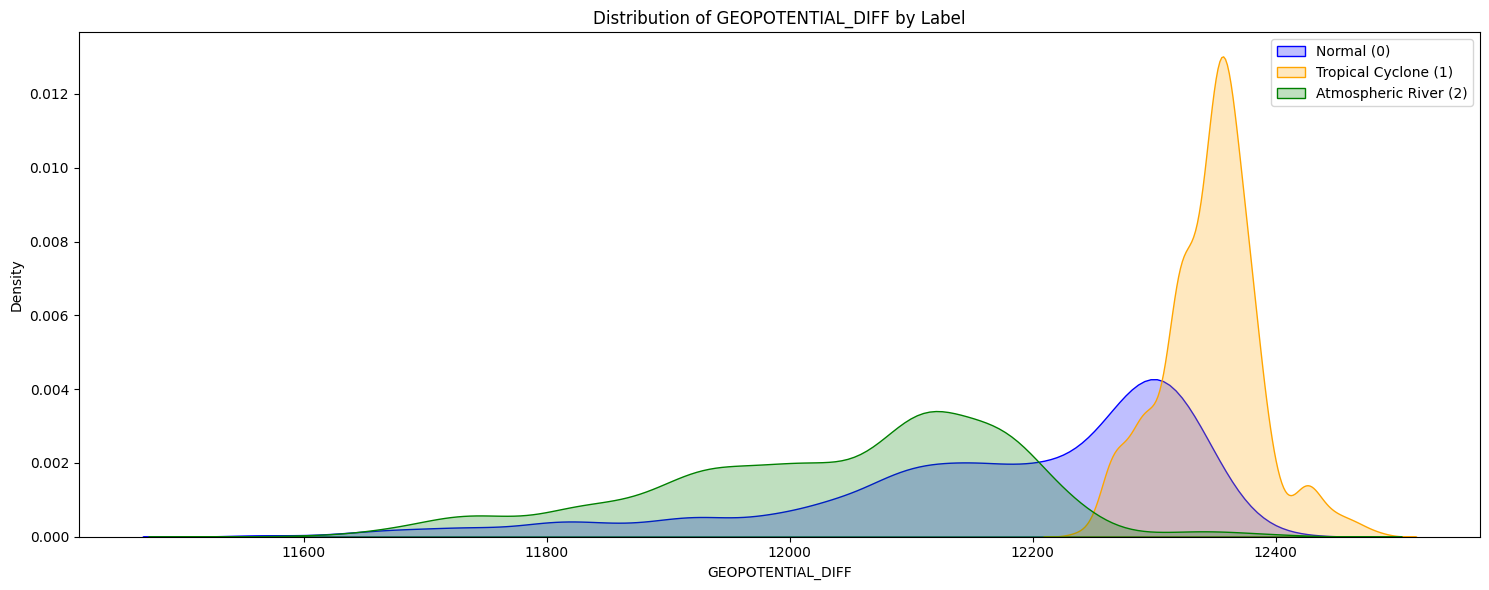

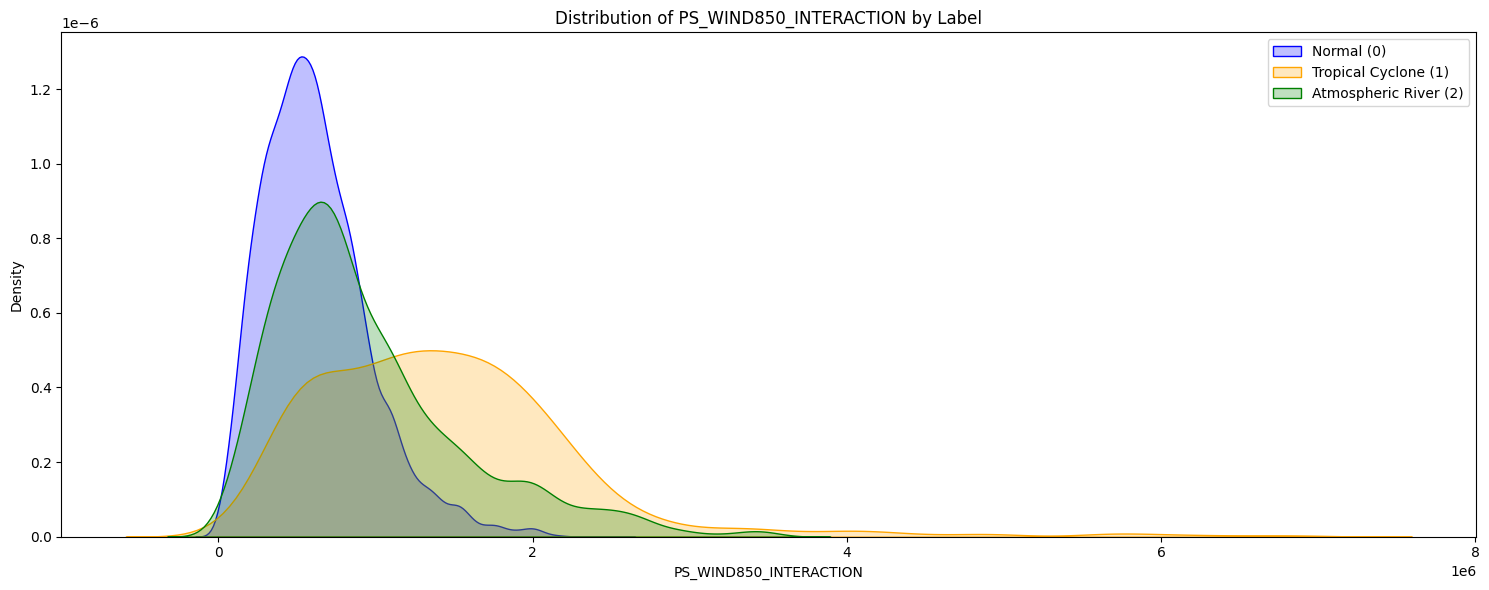

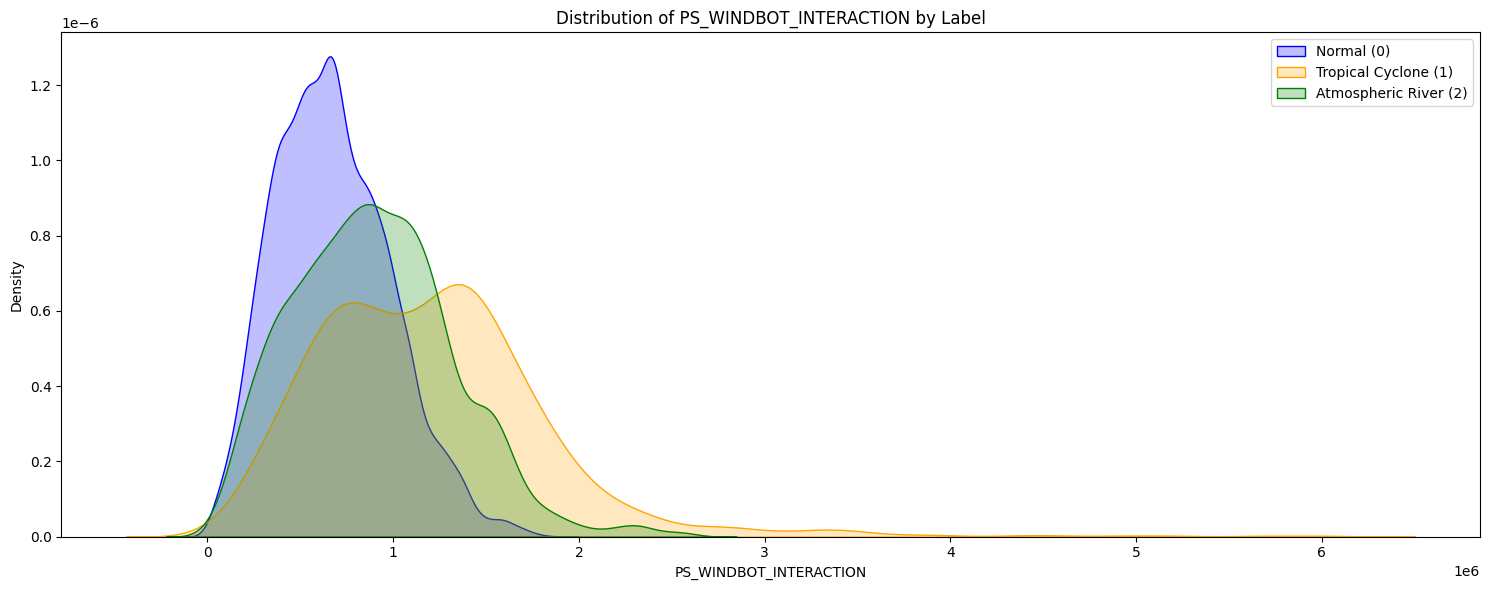

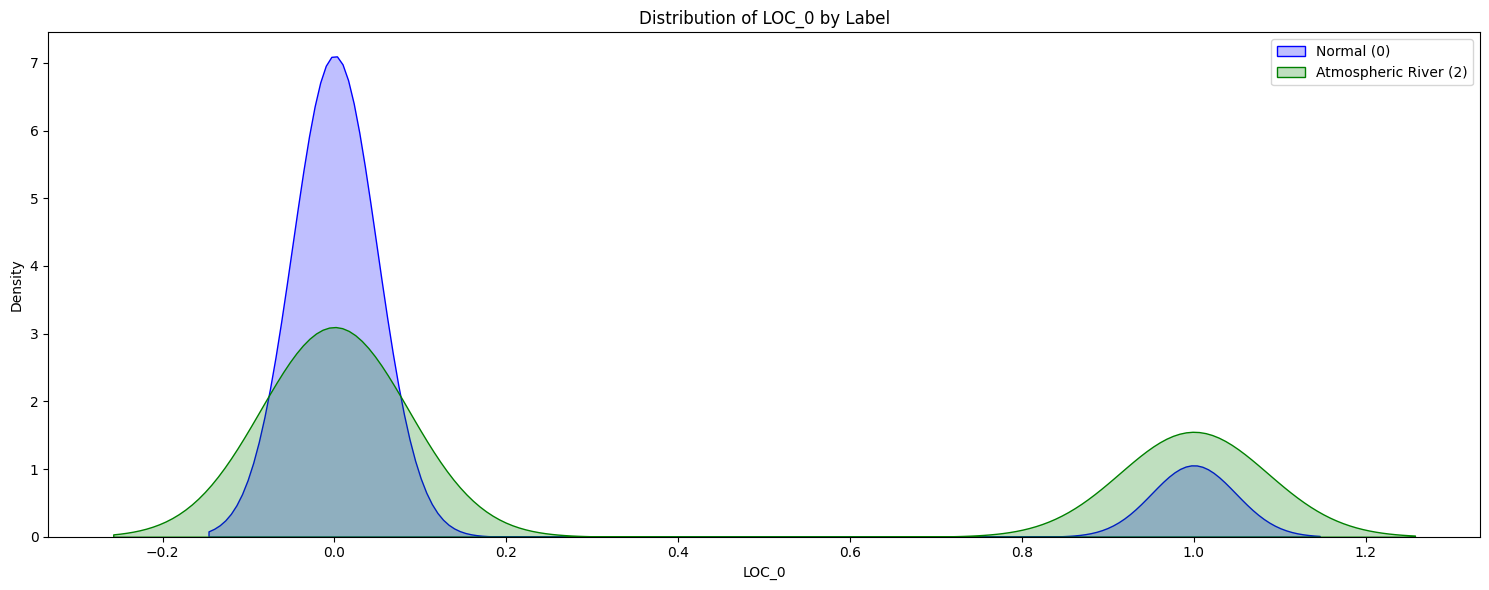

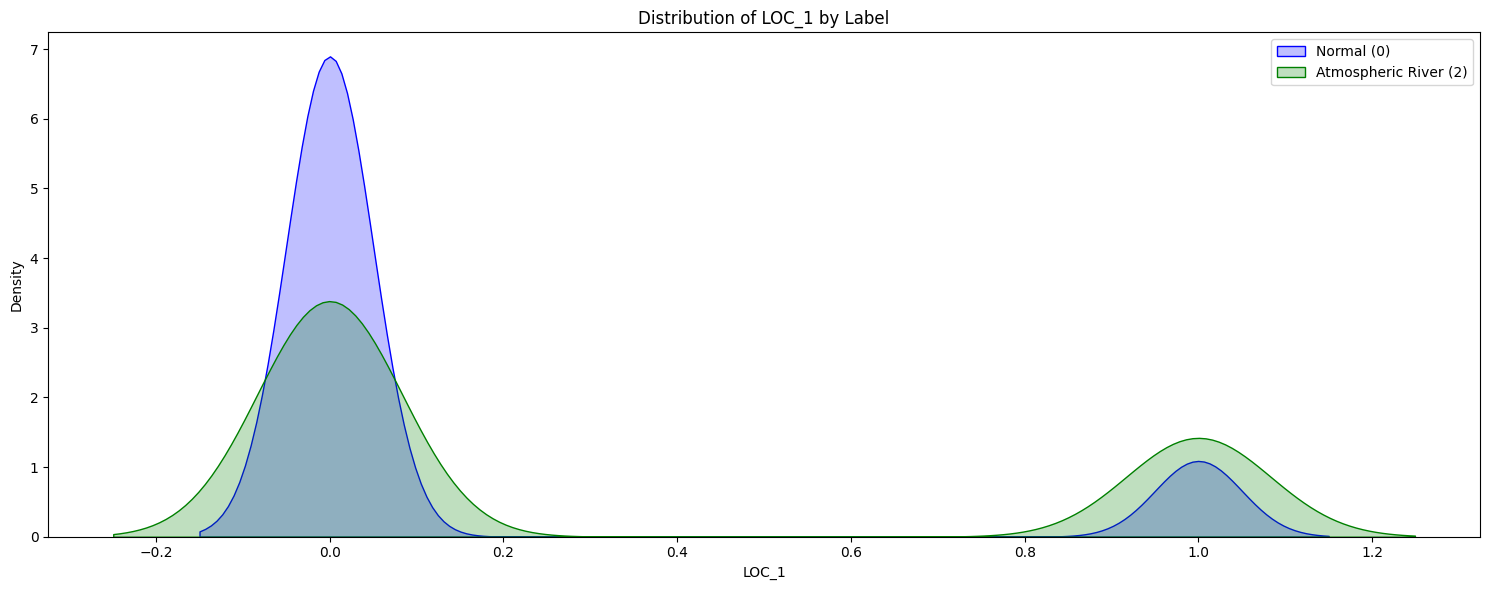

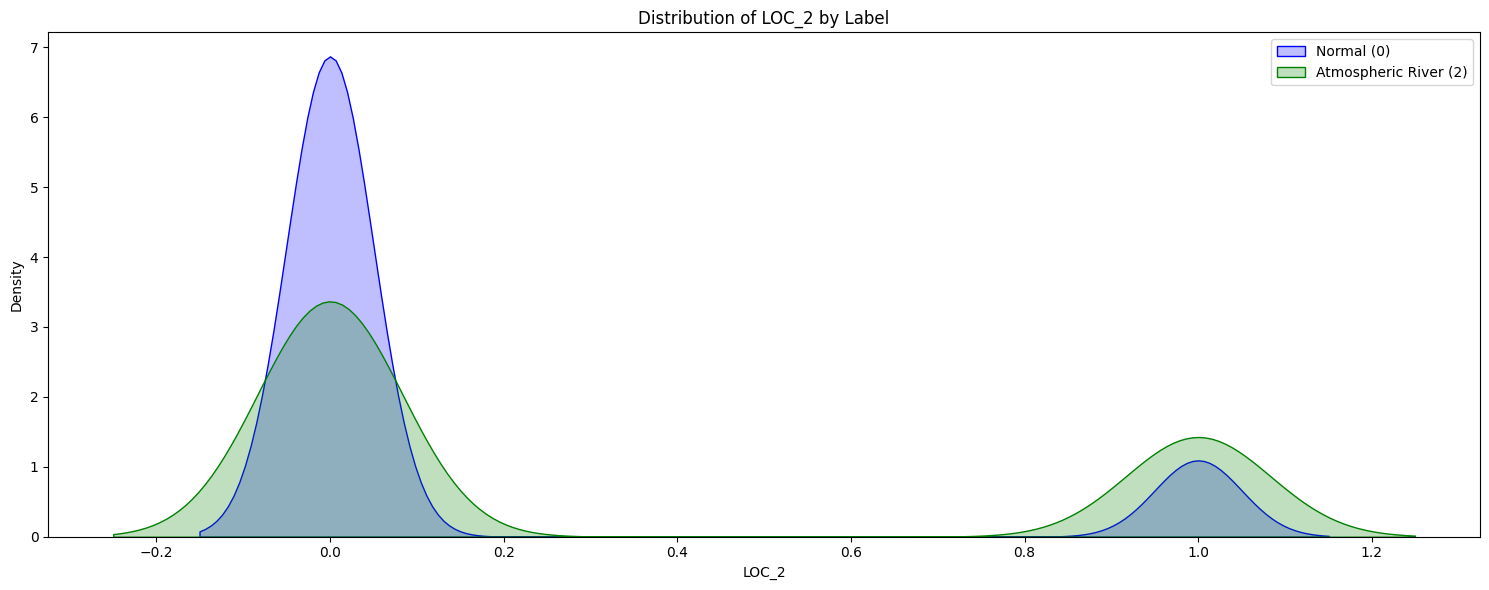

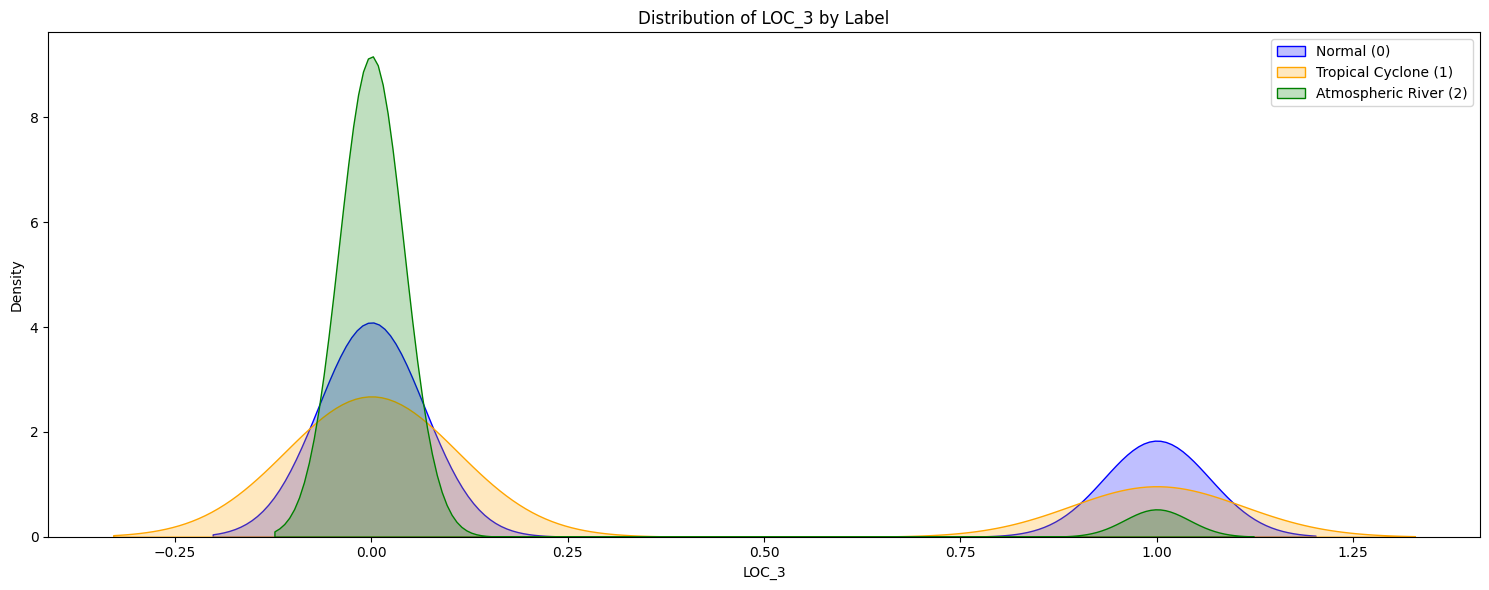

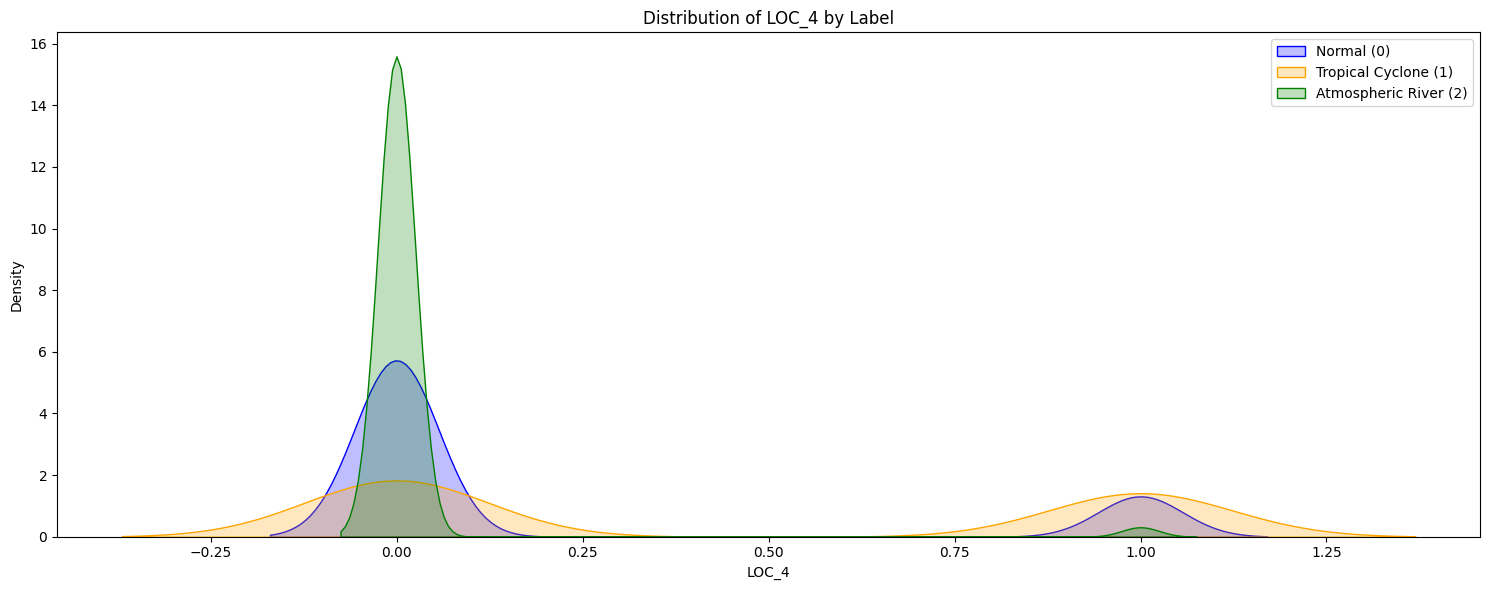

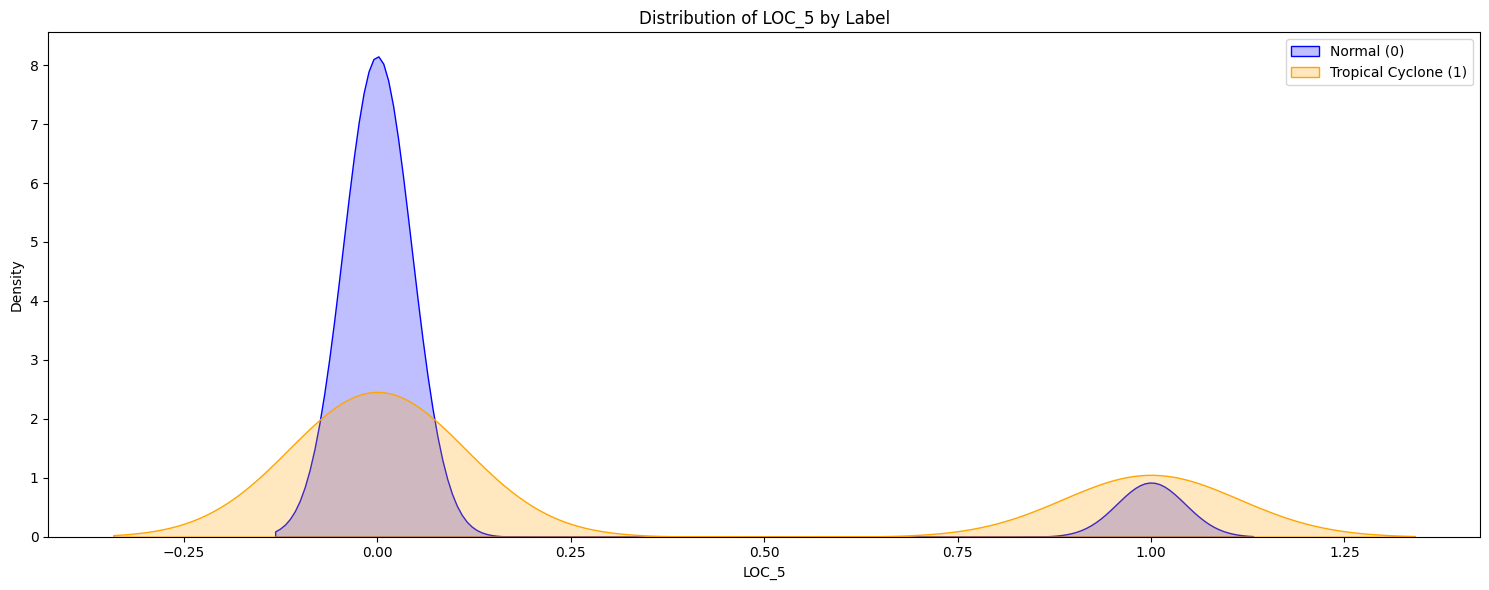

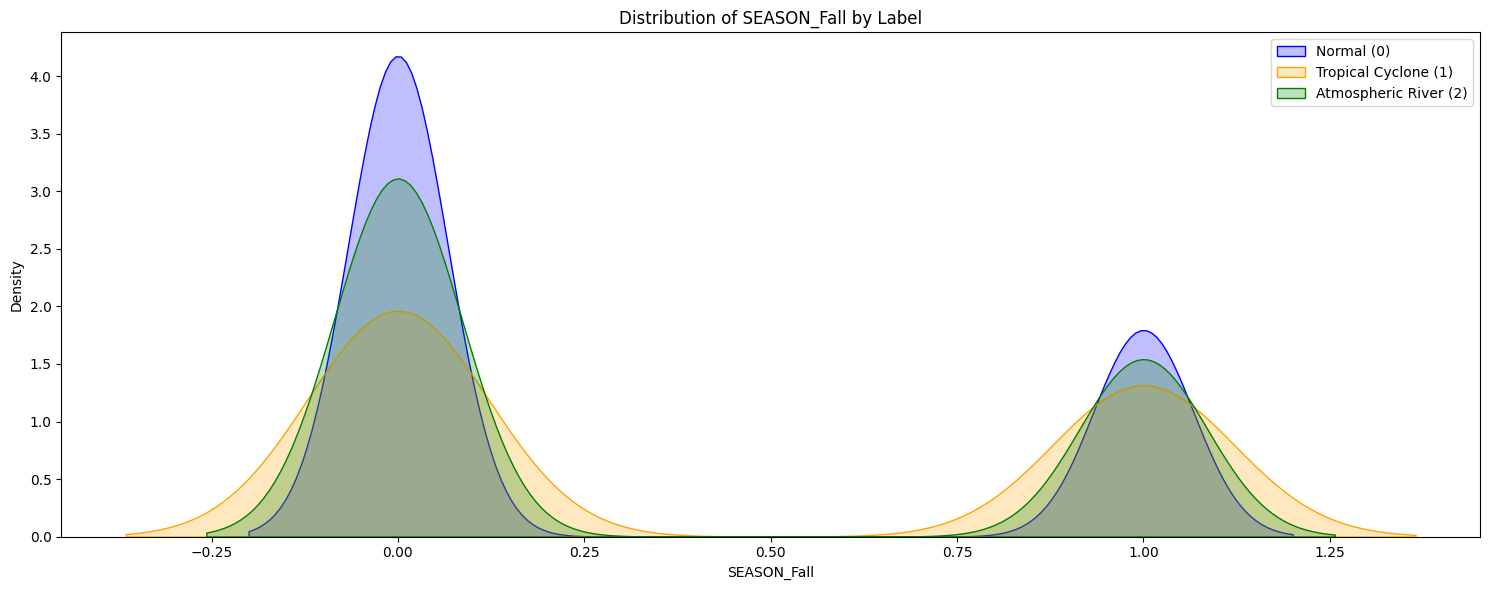

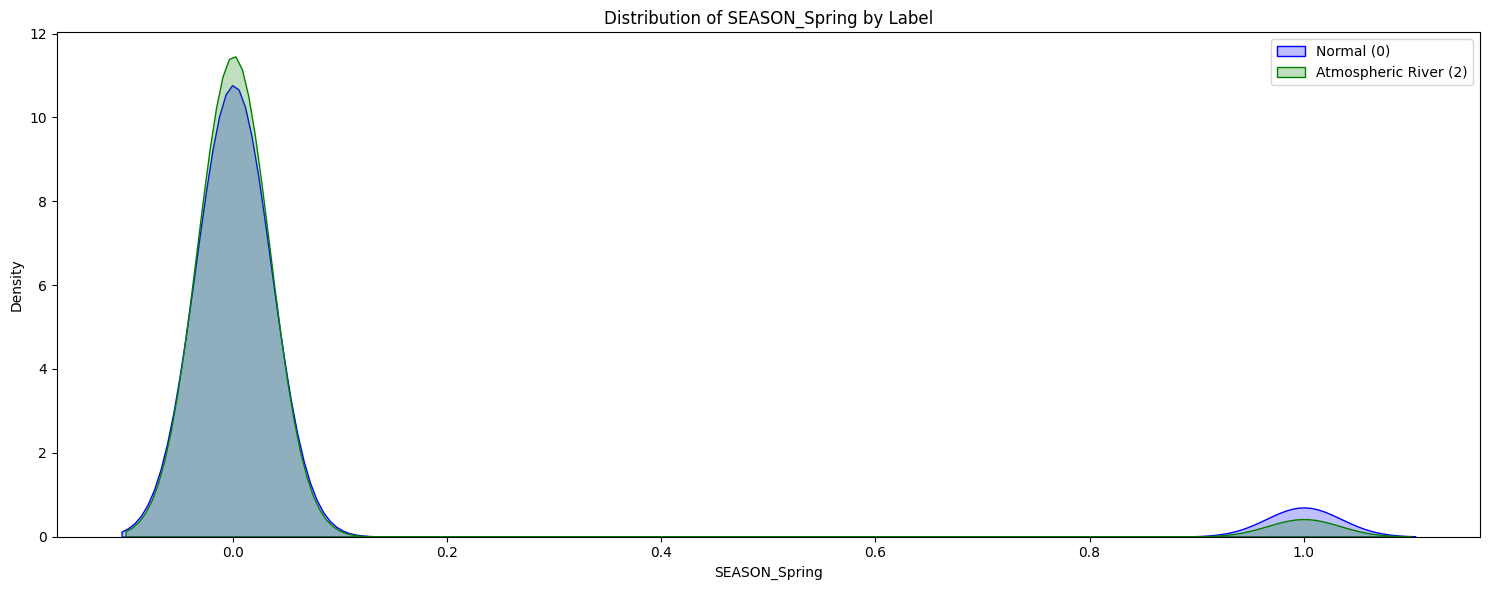

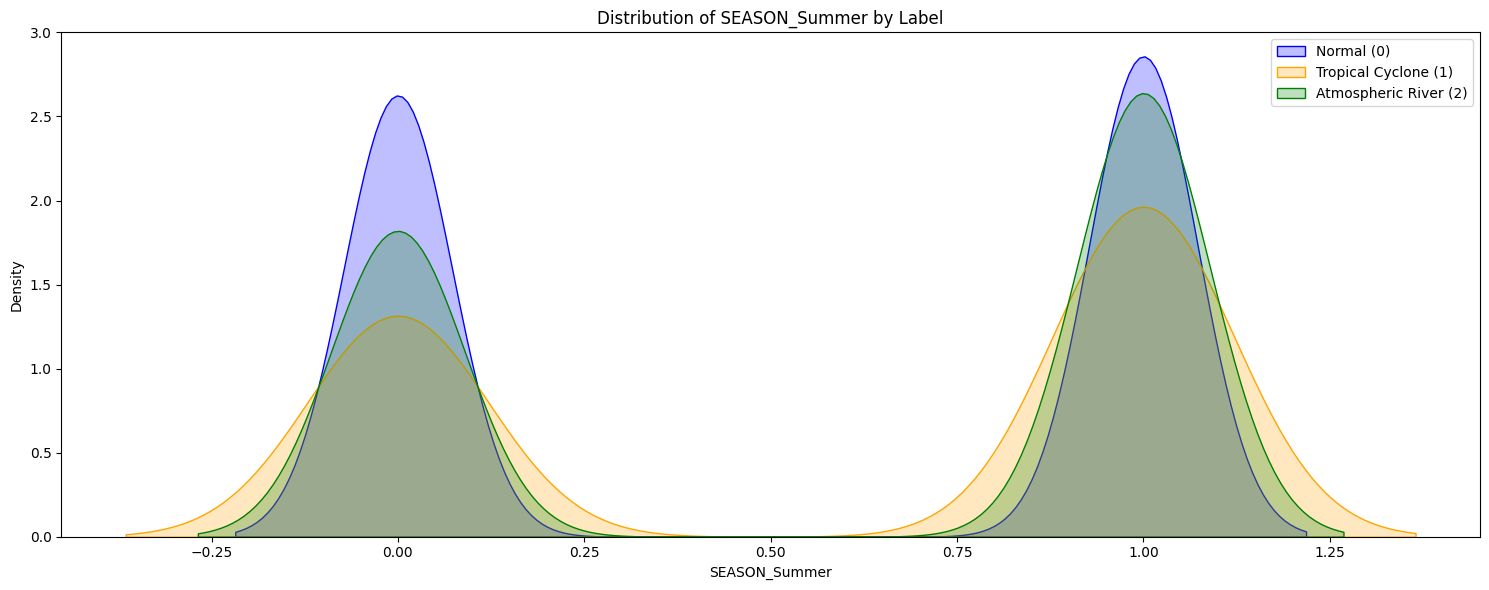

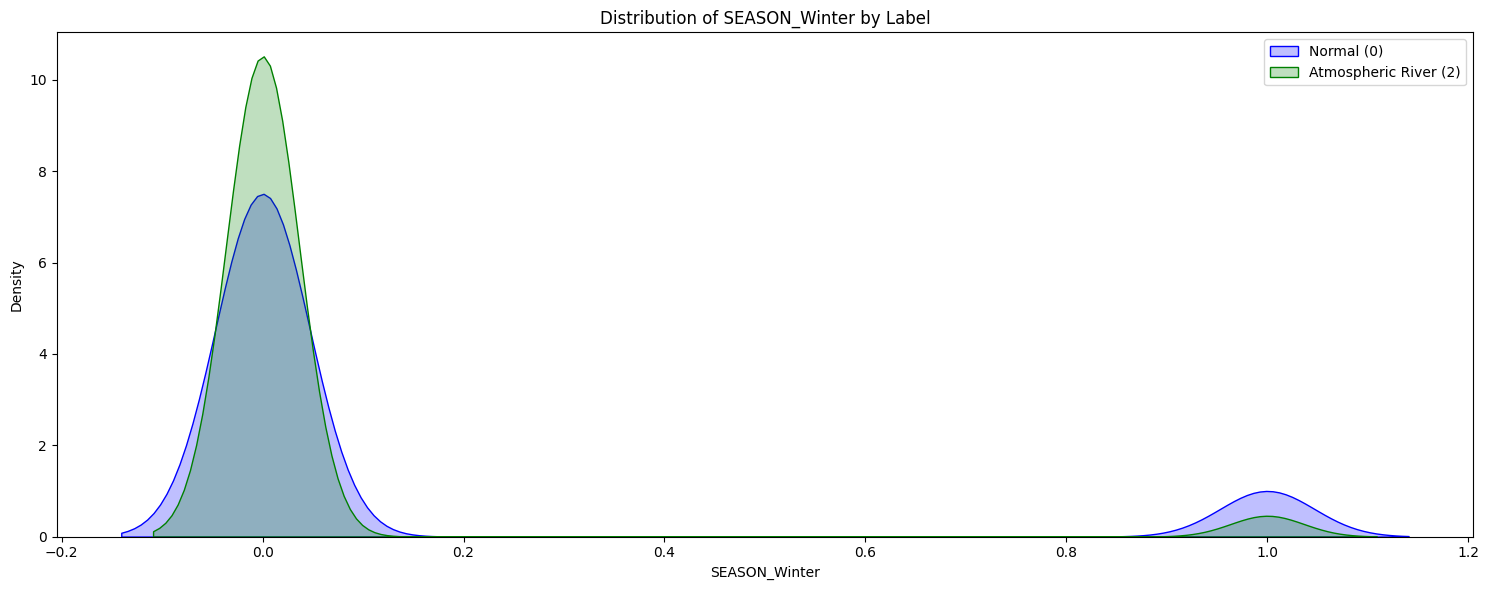

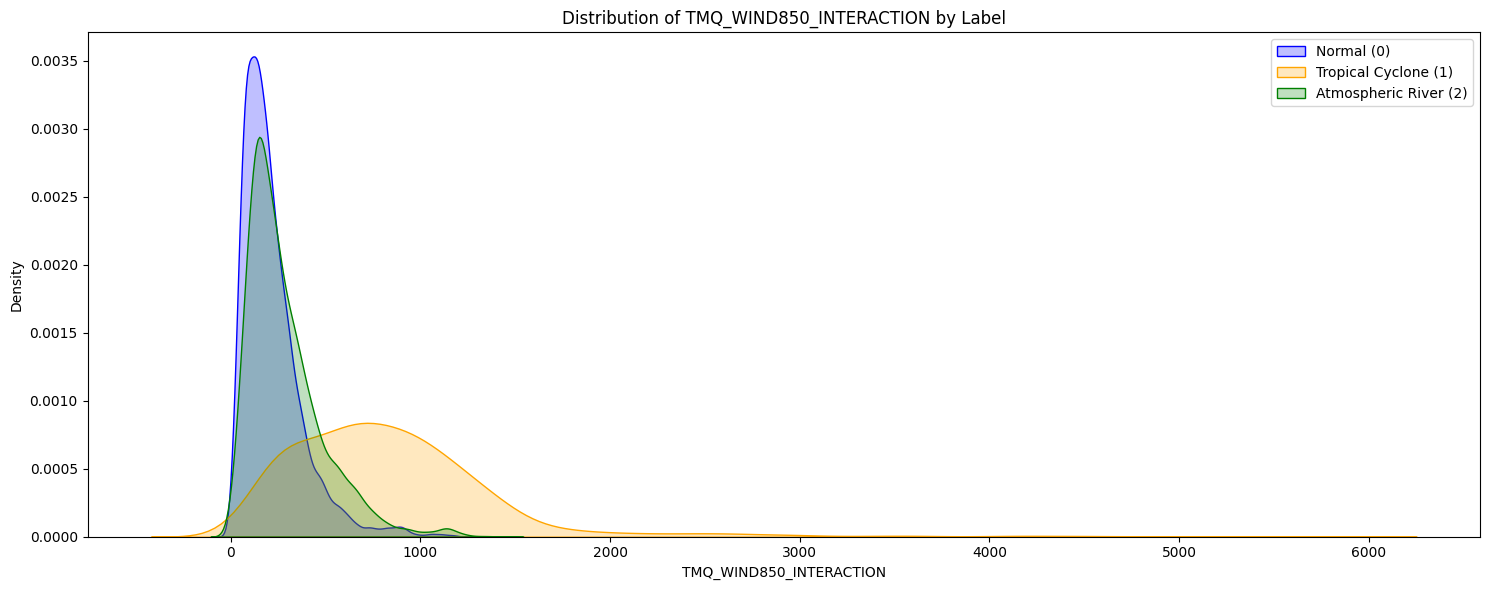

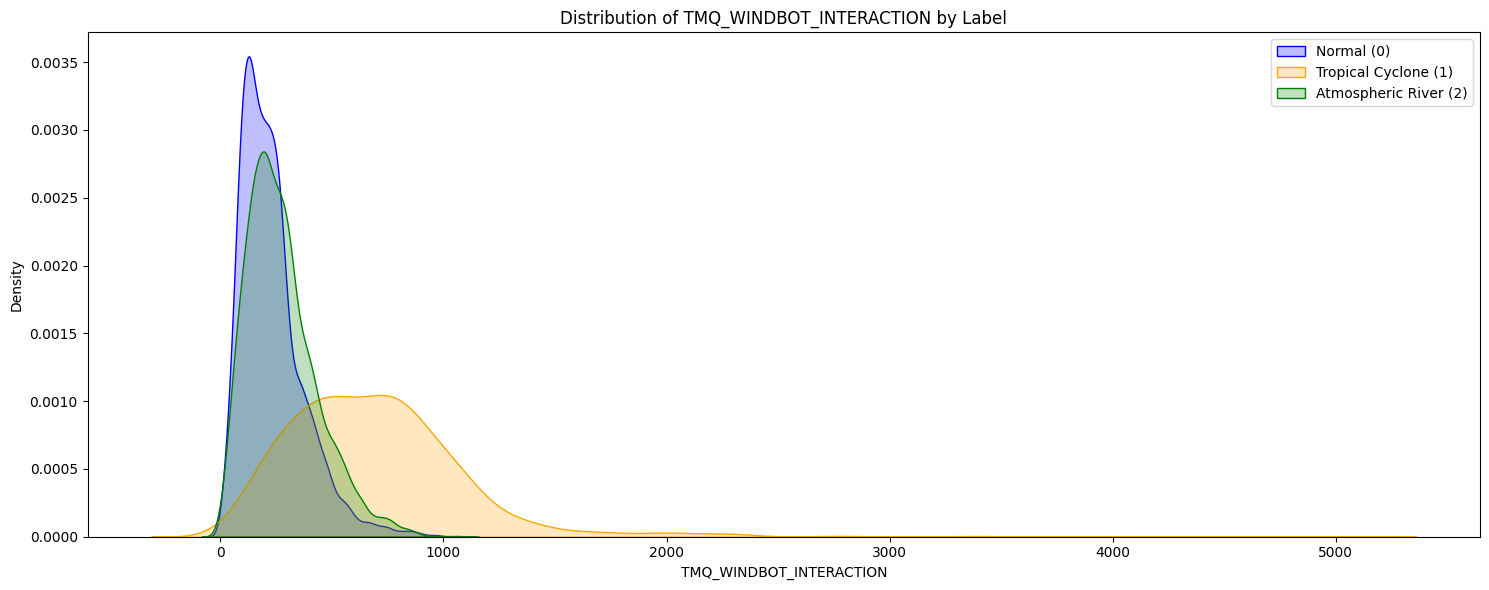

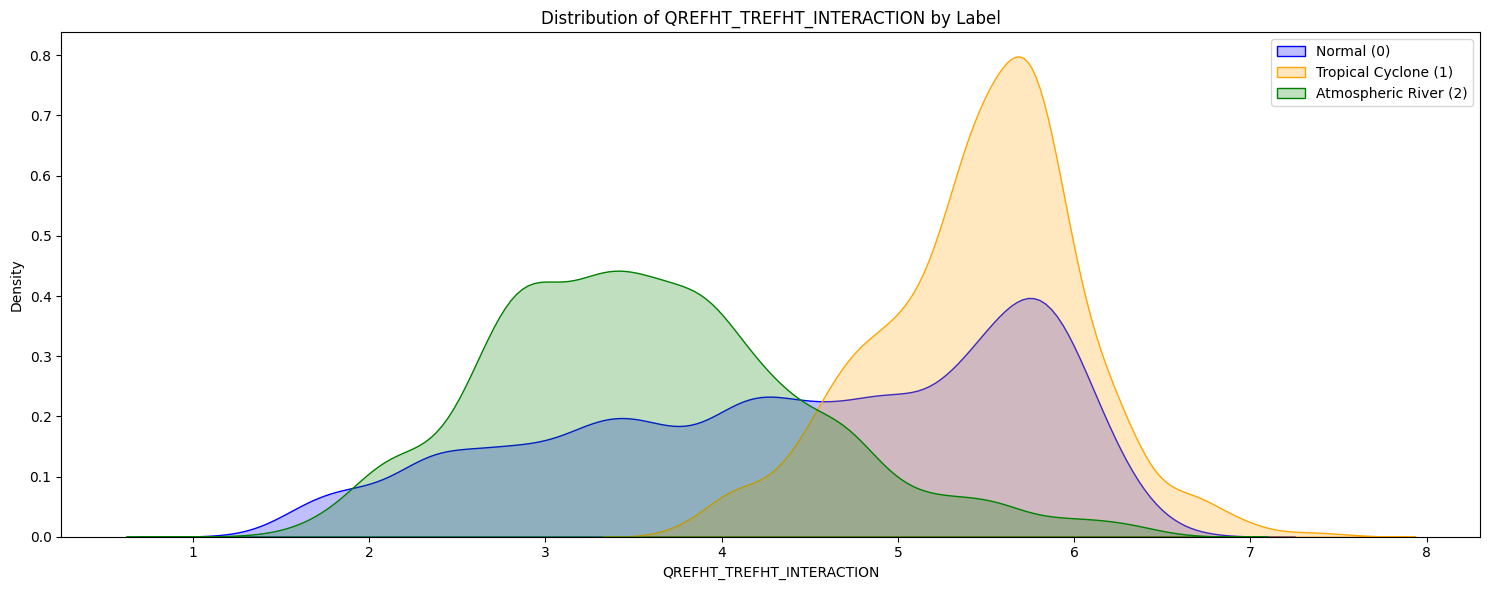

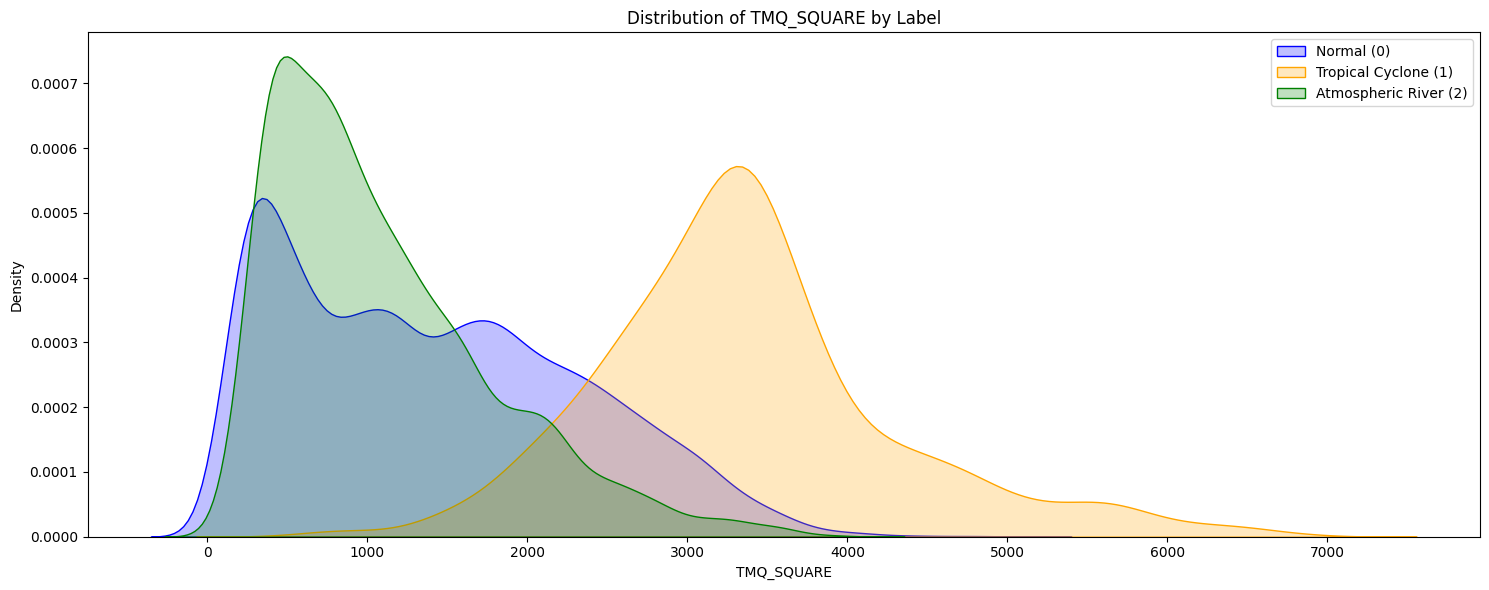

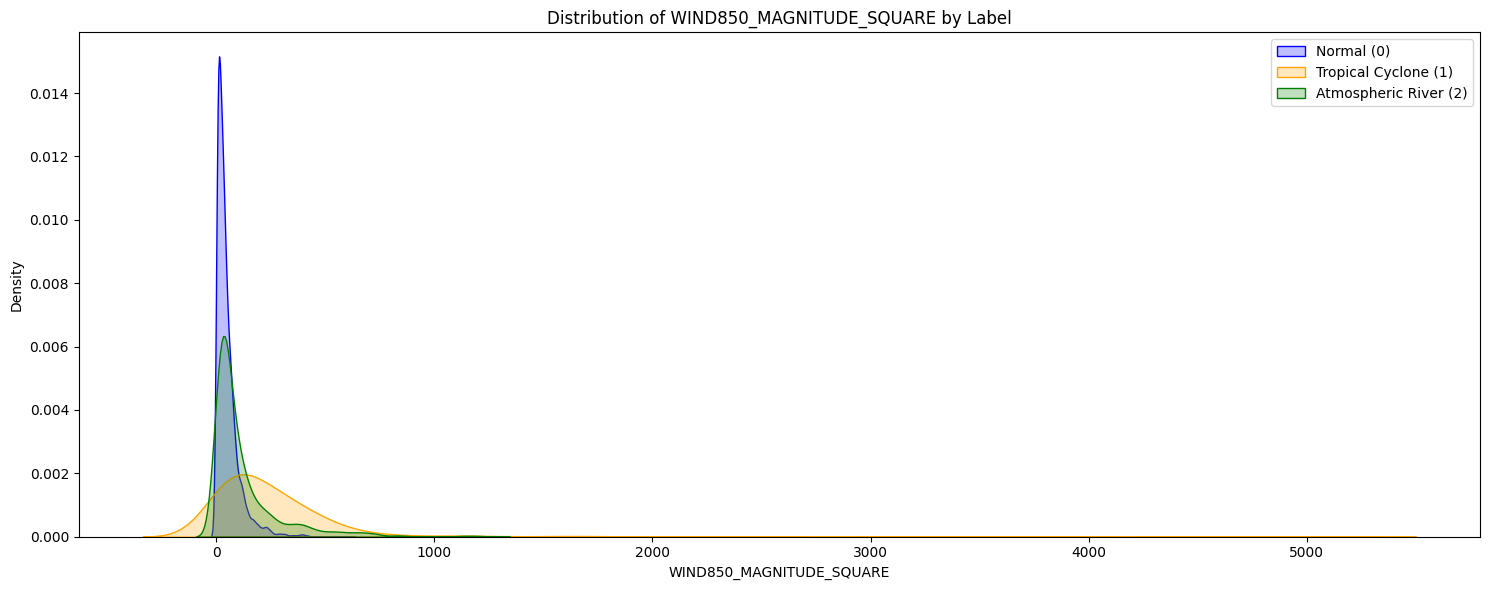

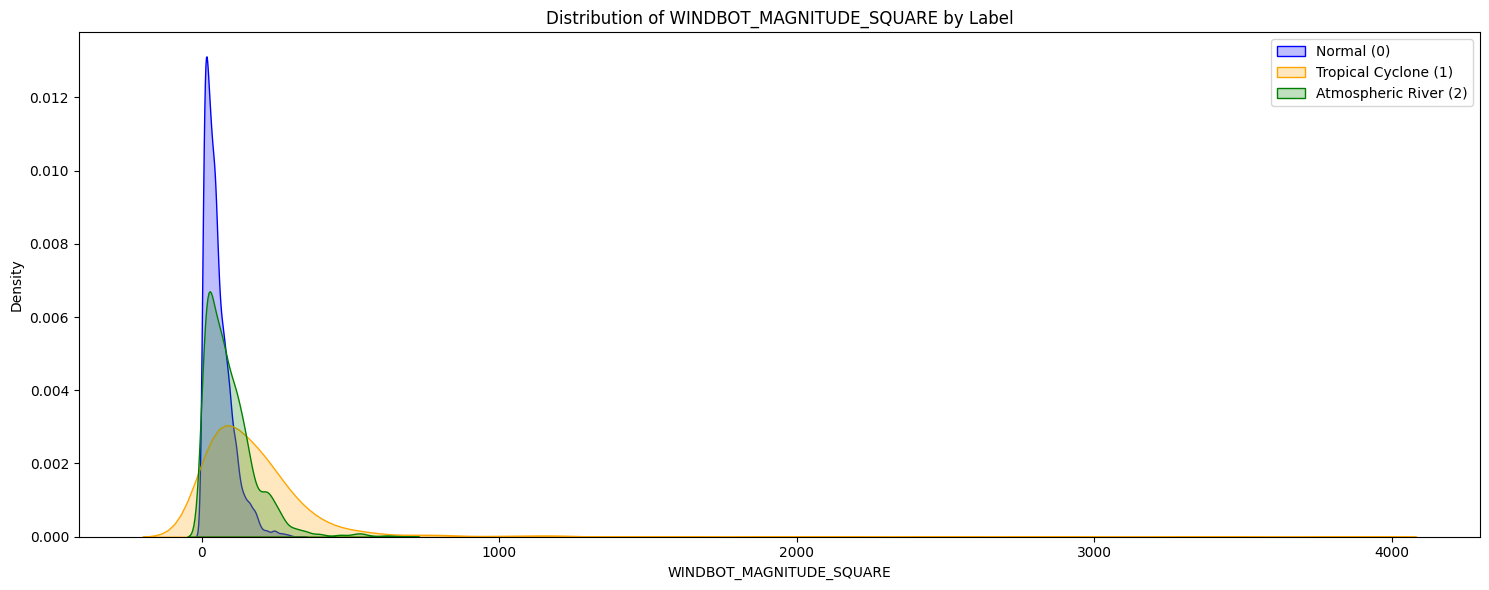

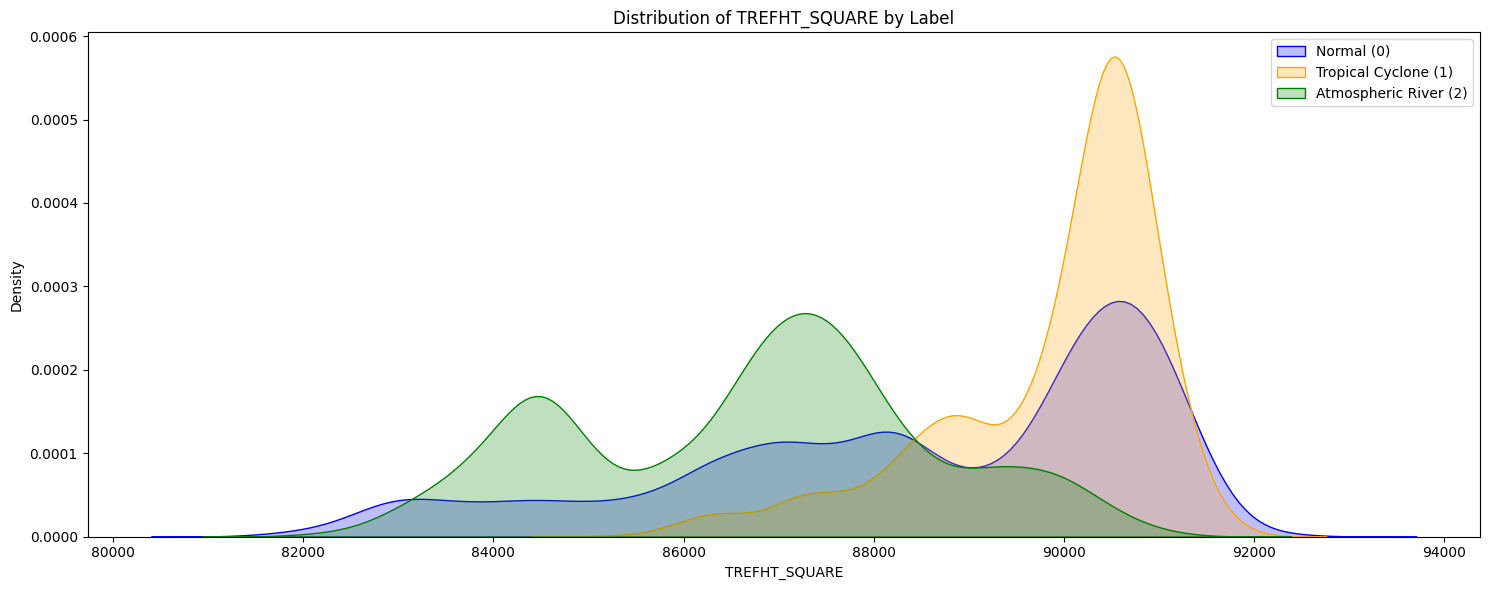

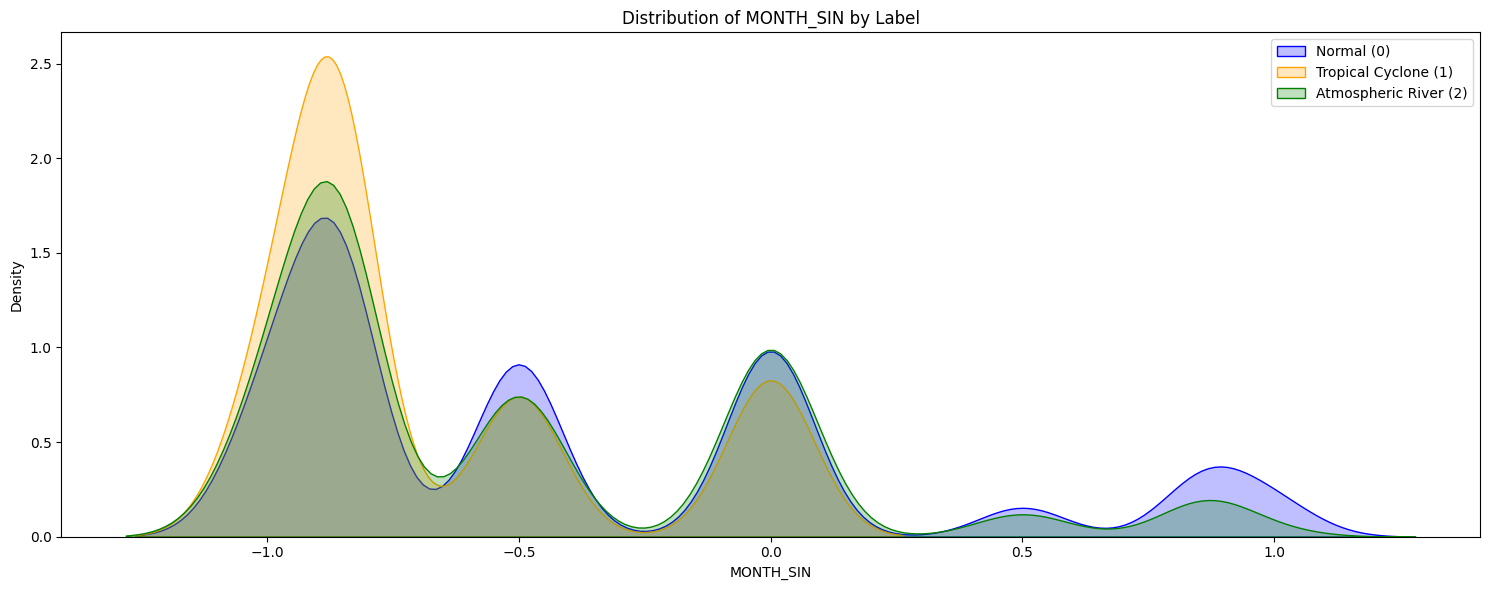

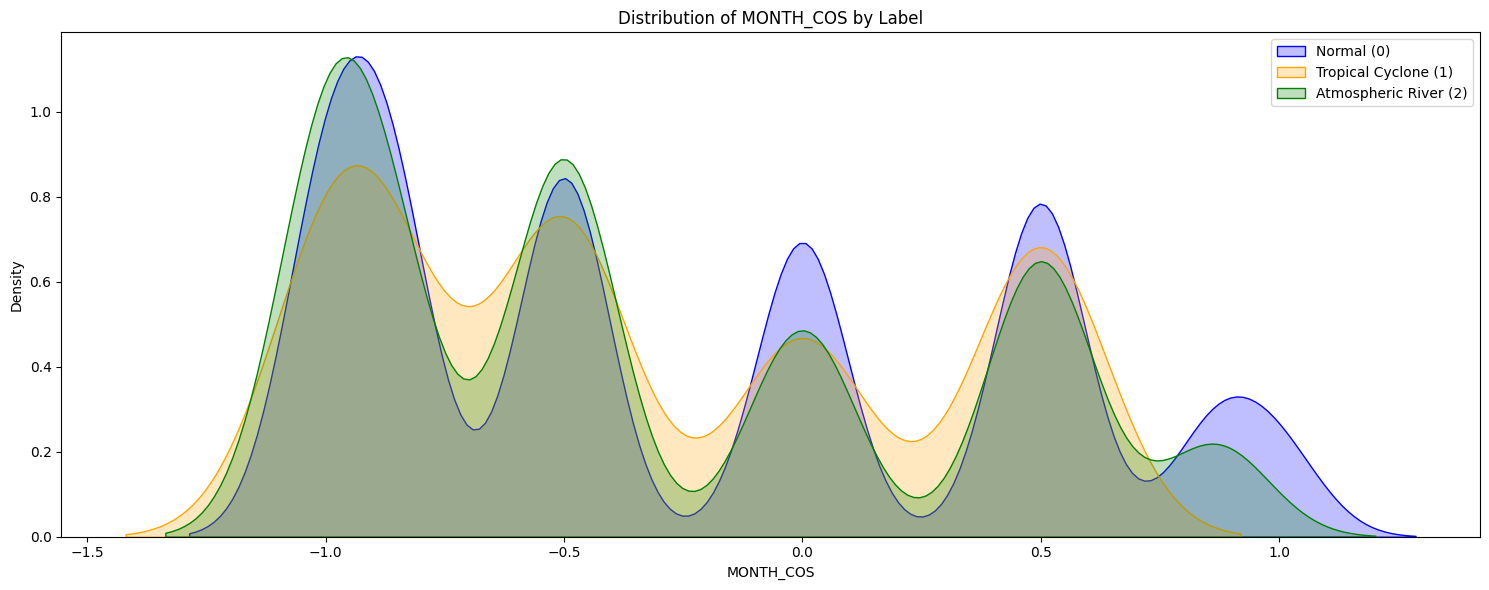

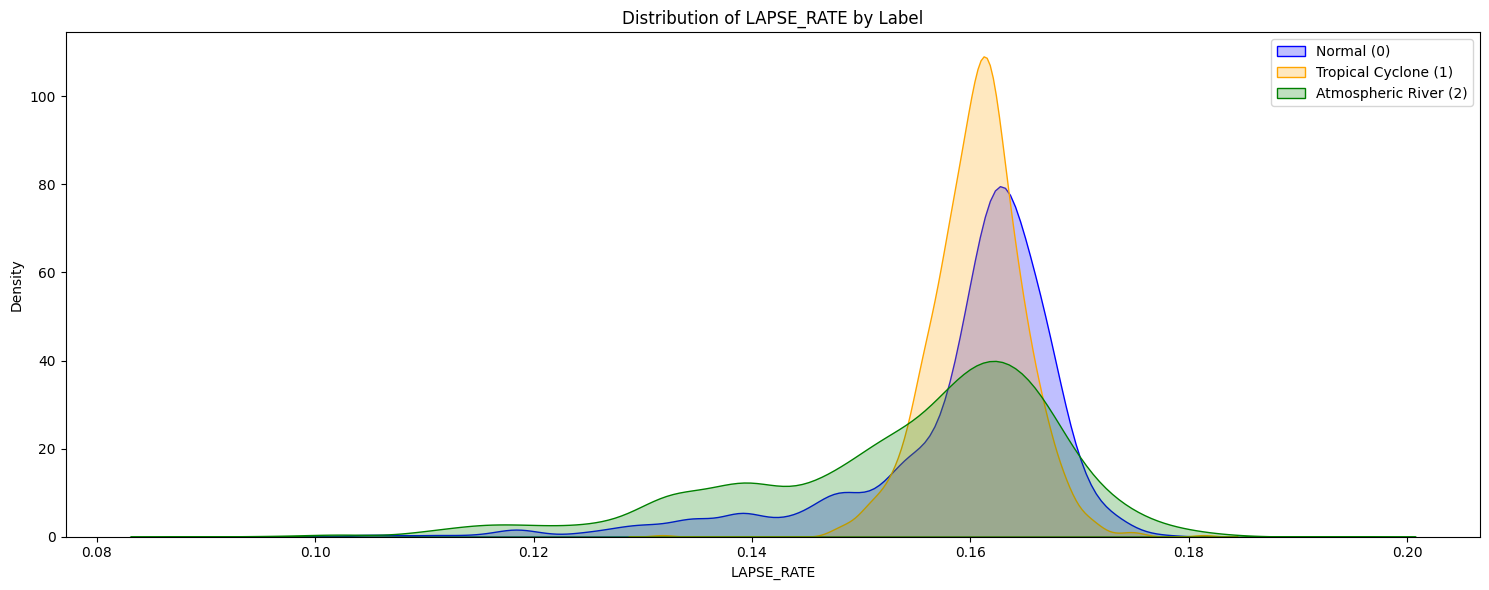

<Figure size 1500x600 with 0 Axes>

In [3]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Define colors and labels
colors = {
    0: 'blue',
    1: 'orange',
    2: 'green'
}

labels = {
    0: "Normal (0)",
    1: "Tropical Cyclone (1)",
    2: "Atmospheric River (2)"
}

# Create a plot for each variable with distinct colors
for var in list(data.columns):
    plt.figure(figsize=(15, 6))

    if var == "Label":
        continue
    
    # Plot KDE for each label with specified colors
    for label_num, color in colors.items():
        subset = data[data['Label'] == label_num]
        sns.kdeplot(subset[var], label=labels[label_num], shade=True, color=color)
    
    plt.title(f"Distribution of {var} by Label")
    plt.legend()
    plt.tight_layout()
    plt.show()
